In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline                       

In [3]:
#setting options to view max. no. of rowas and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("display.float_format", lambda x: '%5f'% x)

In [4]:
#reading csv file of application data
application_data= pd.read_csv("D:\\Data Science\\EDA Credit Risk Analysis\\application_data.csv")

<h2>All The Necessary Information About The Application Data Set</h2>

In [5]:
#Checking the read application data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

In [6]:
#Check the shape of the data set
application_data.shape

(307511, 122)

In [7]:
#Check the basic info about the data set
application_data.info(verbose =True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

<H3>It can be seen from above information that there are some missing values present in the dataset.</H3>

In [8]:
#Checking the basic statitical details of the data set.
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

<H1>Percenatge Missing Values In Each Column Of Data Set</H1>

In [9]:
print(len(application_data))

307511


In [10]:
percent_missvalue= (application_data.isnull().sum()/len(application_data))*100

In [11]:
print(round(percent_missvalue,2))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090000
NAME_TYPE_SUITE                 0.420000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

### Removing The Columns Having Missing Values More Than 50%

In [12]:
#Missing value Calculation.
column_miss = application_data.columns[application_data.isnull().mean() > 0.5]  

In [13]:
#Names of columns having missing values more than 50%
column_miss 

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'], dtype='object')

In [14]:
#Total 41 columns are having missing values greater than 50%.
len(column_miss)

41

### Droping Those Columns Which Are Having Missing Values More Than 50%

In [15]:
application_data.drop(column_miss, axis =1, inplace = True)

In [16]:
#Checking the columns are removed or not
application_data.shape 

(307511, 81)

### Finding Columns Having Missing Values around 13%

In [17]:
#Storing the information of columns having missing less than 15% (i.e. around 13%) in another data frame.
less_misvalues =application_data.loc[:,((application_data.isnull().sum()/len(application_data))*100 <15)] 

In [18]:
less_misvalues.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
# List of columns having missing less than 15% (i.e. around 13%).
less_misvalues.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_

In [20]:
#missing values in the less_misvalues dataframe.
round(less_misvalues.isnull().sum()/len(less_misvalues)*100,2)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.090000
NAME_TYPE_SUITE                0.420000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


<B>It can be observed that"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",AMT_REQ_CREDIT_BUREAU_MON",AMT_REQ_CREDIT_BUREAU_QRT",
AMT_REQ_CREDIT_BUREAU_YEAR" are having missing values around 13%<B/>

In [21]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_HOUR"].head(10)

0   0.000000
1   0.000000
2   0.000000
3        nan
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9        nan
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [22]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_HOUR"].tail(10)

307501        nan
307502   0.000000
307503   0.000000
307504        nan
307505   0.000000
307506        nan
307507        nan
307508   1.000000
307509   0.000000
307510   0.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [23]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count   265992.000000
mean         0.006402
std          0.083849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [24]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.000000    264366
1.000000      1560
2.000000        56
3.000000         9
4.000000         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

### Imputation 1: "AMT_REQ_CREDIT_BUREAU_HOUR" null values can be imputed with "Mode" value i.e. 0 for this column.

In [25]:
#Checking for the other column i.e. AMT_REQ_CREDIT_BUREAU_DAY
less_misvalues["AMT_REQ_CREDIT_BUREAU_DAY"].head(10)

0   0.000000
1   0.000000
2   0.000000
3        nan
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9        nan
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [26]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count   265992.000000
mean         0.007000
std          0.110757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [27]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.000000    264503
1.000000      1292
2.000000       106
3.000000        45
4.000000        26
5.000000         9
6.000000         8
9.000000         2
8.000000         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

### Imputation 2: "AMT_REQ_CREDIT_BUREAU_DAY" null values can be imputed with "Mode" value i.e. 0 for this column.

In [28]:
#Checking for the other column i.e. AMT_REQ_CREDIT_BUREAU_WEEK
less_misvalues["AMT_REQ_CREDIT_BUREAU_WEEK"].head(10)

0   0.000000
1   0.000000
2   0.000000
3        nan
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9        nan
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [29]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count   265992.000000
mean         0.034362
std          0.204685
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [30]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.000000    257456
1.000000      8208
2.000000       199
3.000000        58
4.000000        34
6.000000        20
5.000000        10
8.000000         5
7.000000         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

### Imputation 3: "AMT_REQ_CREDIT_BUREAU_WEEK" null values can be imputed with "Mode" value i.e. 0 for this column.

In [31]:
#Checking for the other column i.e. AMT_REQ_CREDIT_BUREAU_MON
less_misvalues["AMT_REQ_CREDIT_BUREAU_MON"].head(15)

0    0.000000
1    0.000000
2    0.000000
3         nan
4    0.000000
5    0.000000
6    1.000000
7    0.000000
8    0.000000
9         nan
10   1.000000
11   0.000000
12   1.000000
13   0.000000
14        nan
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [32]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count   265992.000000
mean         0.267395
std          0.916002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [33]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.000000     222233
1.000000      33147
2.000000       5386
3.000000       1991
4.000000       1076
5.000000        602
6.000000        343
7.000000        298
9.000000        206
8.000000        185
10.000000       132
11.000000       119
12.000000        77
13.000000        72
14.000000        40
15.000000        35
16.000000        23
17.000000        14
18.000000         6
19.000000         3
24.000000         1
27.000000         1
22.000000         1
23.000000         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

### Imputation 4: "AMT_REQ_CREDIT_BUREAU_MON" null values can be imputed with "Mode" value i.e. 0 for this column.

In [34]:
#Checking for the other column i.e. AMT_REQ_CREDIT_BUREAU_QRT
less_misvalues["AMT_REQ_CREDIT_BUREAU_QRT"].head()

0   0.000000
1   0.000000
2   0.000000
3        nan
4   0.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [35]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count   265992.000000
mean         0.265474
std          0.794056
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [36]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.000000      215417
1.000000       33862
2.000000       14412
3.000000        1717
4.000000         476
5.000000          64
6.000000          28
7.000000           7
8.000000           7
19.000000          1
261.000000         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

### Imputation 5: "AMT_REQ_CREDIT_BUREAU_MON" null values can be imputed with "Mode" value i.e. 0 for this column.

In [37]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_YEAR"].head()

0   1.000000
1   0.000000
2   0.000000
3        nan
4   0.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [38]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count   265992.000000
mean         1.899974
std          1.869295
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [39]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.000000     71801
1.000000     63405
2.000000     50192
3.000000     33628
4.000000     20714
5.000000     12052
6.000000      6967
7.000000      3869
8.000000      2127
9.000000      1096
11.000000       31
12.000000       30
10.000000       22
13.000000       19
14.000000       10
17.000000        7
15.000000        6
19.000000        4
18.000000        4
16.000000        3
21.000000        1
23.000000        1
25.000000        1
20.000000        1
22.000000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

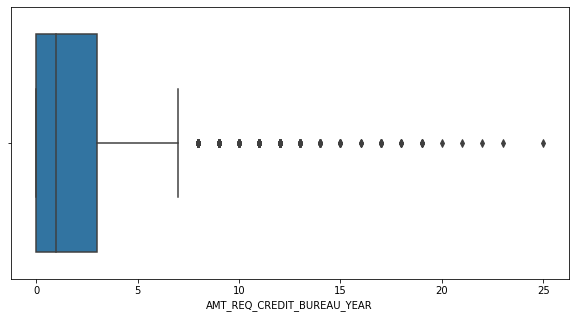

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(less_misvalues["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

In [41]:
less_misvalues["AMT_REQ_CREDIT_BUREAU_YEAR"].median()

1.0

### Imputation 6: "AMT_REQ_CREDIT_BUREAU_YEAR" null values can be imputed with "Median" value i.e. 1 for this column.

## CHECKING FOR THE DATA TYPE.

In [42]:
#Checking the dataframe application_data again.
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Again performing the basic operation on the remaing data set

In [43]:
application_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [44]:
#Checking the unique values in the columns
application_data.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

### 1) TARGET ---> Categorical data type: Object

In [45]:
application_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [46]:
#Converting the data type of TARGET column to object.
application_data["TARGET"] = application_data["TARGET"].astype(str)

In [47]:
#Checking the datatype of TARGET column.
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### 2) FLAG_MOBIL ---> Categorical data type: Object

In [48]:
#Checking the column is categorical or not
application_data["FLAG_MOBIL"].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [49]:
#Checking the datatype of the column
application_data["FLAG_MOBIL"].dtype

dtype('int64')

In [50]:
#Converting the data type from int to object.
application_data["FLAG_MOBIL"]= application_data["FLAG_MOBIL"].astype(str)

In [51]:
##Verifying the datatype of the column
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### 3) FLAG_EMP_PHONE ---> Categorical data type: Object

In [52]:
application_data["FLAG_EMP_PHONE"].value_counts()

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [53]:
application_data["FLAG_EMP_PHONE"].dtype

dtype('int64')

In [54]:
#Converting the datatype of FLAG_EMP_PHONE column to Object
application_data["FLAG_EMP_PHONE"]= application_data["FLAG_EMP_PHONE"].astype(str)

In [55]:
#Verifying the conversion of datatype for FLAG_EMP_PHONE
application_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Checking the outliers in the numerical columns

In [56]:
#Checking the unique values in each column.
application_data.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

### Some important columns for which ouliers will be checked are: AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_CREDIT , AMT_ANNUITY 

In [57]:
application_data["AMT_INCOME_TOTAL"]

0        202500.000000
1        270000.000000
2         67500.000000
3        135000.000000
4        121500.000000
              ...     
307506   157500.000000
307507    72000.000000
307508   153000.000000
307509   171000.000000
307510   157500.000000
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [58]:
application_data["AMT_INCOME_TOTAL"].value_counts()

135000.000000    35750
112500.000000    31019
157500.000000    26556
180000.000000    24719
90000.000000     22483
                 ...  
101119.500000        1
79425.000000         1
101128.500000        1
202275.000000        1
262174.500000        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [59]:
application_data["AMT_INCOME_TOTAL"].describe()

count      307511.000000
mean       168797.919297
std        237123.146279
min         25650.000000
25%        112500.000000
50%        147150.000000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [60]:
application_data["AMT_INCOME_TOTAL"]/1000

0        202.500000
1        270.000000
2         67.500000
3        135.000000
4        121.500000
            ...    
307506   157.500000
307507    72.000000
307508   153.000000
307509   171.000000
307510   157.500000
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

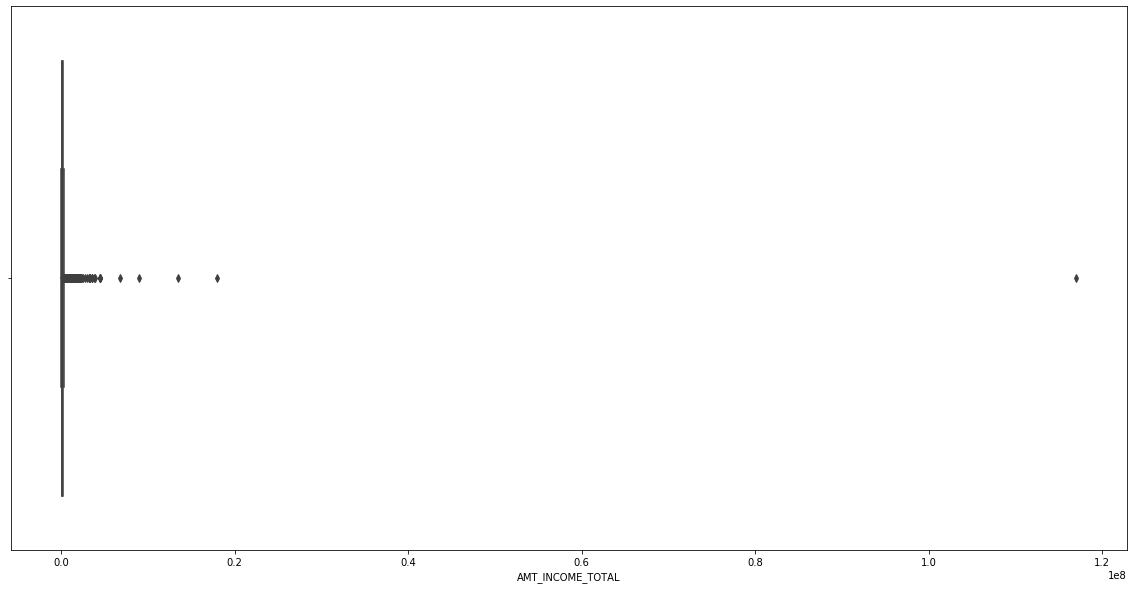

In [61]:
#Plotting a boxplot for AMT_INCOME_TOTAL
plt.figure(figsize =(20,10))
sns.boxplot(application_data["AMT_INCOME_TOTAL"])
plt.show()

### OUTLIER_1 : It is so evident from the boxplot that "Outliers" are present in the AMT_INCOME_TOTAL as 75% of the data is within 202500.0 and max value is 117000000.0 

In [62]:
application_data["AMT_GOODS_PRICE"].value_counts()

450000.000000    26022
225000.000000    25282
675000.000000    24962
900000.000000    15416
270000.000000    11428
                 ...  
705892.500000        1
442062.000000        1
353641.500000        1
353749.500000        1
738945.000000        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [63]:
application_data["AMT_GOODS_PRICE"].describe()

count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

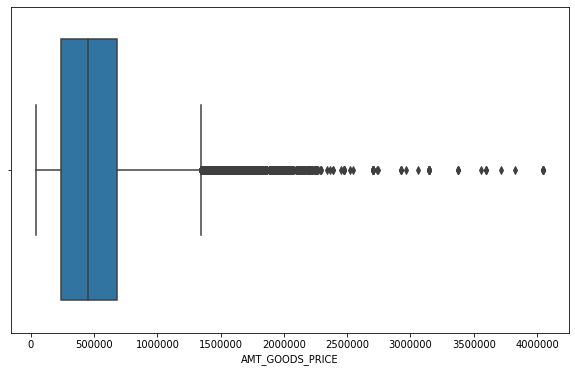

In [64]:
plt.figure(figsize = (10,6))
sns.boxplot(application_data["AMT_GOODS_PRICE"])
plt.show()

#### OUTLIER_2: It is so evident from the boxplot that "Outliers" are present in the AMT_GOODS_PRICE. 75% of the amount good price is within 679500.0

In [65]:
application_data["AMT_CREDIT"].value_counts()

450000.000000     9709
675000.000000     8877
225000.000000     8162
180000.000000     7342
270000.000000     7241
                  ... 
827100.000000        1
413442.000000        1
1652458.500000       1
825853.500000        1
2097058.500000       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [66]:
application_data["AMT_CREDIT"].describe()

count    307511.000000
mean     599025.999706
std      402490.776996
min       45000.000000
25%      270000.000000
50%      513531.000000
75%      808650.000000
max     4050000.000000
Name: AMT_CREDIT, dtype: float64

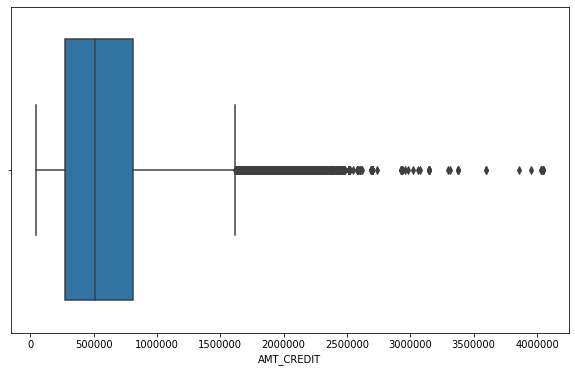

In [67]:
plt.figure(figsize = (10,6))
sns.boxplot(application_data["AMT_CREDIT"])
plt.show()

#### OUTLIER_3: It can be observed from the boxplot that "Outliers" are present in the AMT_CREDIT and 75% of the data lies 808650.0

In [68]:
application_data["AMT_ANNUITY"].value_counts()

9000.000000     6385
13500.000000    5514
6750.000000     2279
10125.000000    2035
37800.000000    1602
                ... 
15210.000000       1
50265.000000       1
73012.500000       1
40558.500000       1
4437.000000        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [69]:
application_data["AMT_ANNUITY"].describe()

count   307499.000000
mean     27108.573909
std      14493.737315
min       1615.500000
25%      16524.000000
50%      24903.000000
75%      34596.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

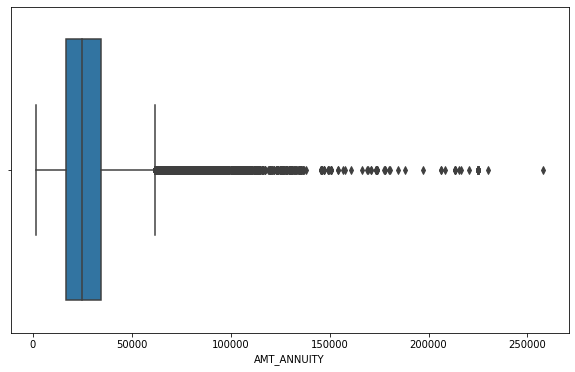

In [70]:
plt.figure(figsize = (10,6))
sns.boxplot(application_data["AMT_ANNUITY"])
plt.show()

### OUTLIER_4: It can be seen from the boxplot that "Outliers" are present in the AMT_ANNUITY and 75 % of the data lies with 34596.0


In [71]:
application_data["DAYS_ID_PUBLISH"].value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [72]:
application_data["DAYS_ID_PUBLISH"].describe()

count   307511.000000
mean     -2994.202373
std       1509.450419
min      -7197.000000
25%      -4299.000000
50%      -3254.000000
75%      -1720.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

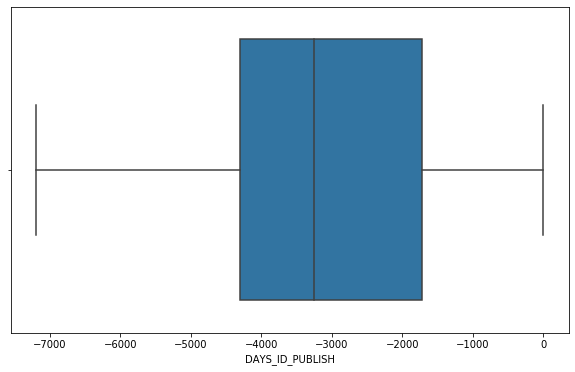

In [73]:
plt.figure(figsize = (10,6))
sns.boxplot(application_data["DAYS_ID_PUBLISH"])
plt.show()

### OUTLIER_5: No "Outliers" are present in the DAYS_ID_PUBLISH as it can be observed from boxplot. It can also be observed that more no. of ID's are created around 3200 days i.e. approx within 8 years.

### BINNING

#### BINNING "AMT_INCOME_TOTAL" Column

In [74]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
application_data["AMT_INCOME_TOTAL"].describe()

count      307511.000000
mean       168797.919297
std        237123.146279
min         25650.000000
25%        112500.000000
50%        147150.000000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [76]:
application_data["AMT_INCOME_TOTAL"].median()

147150.0

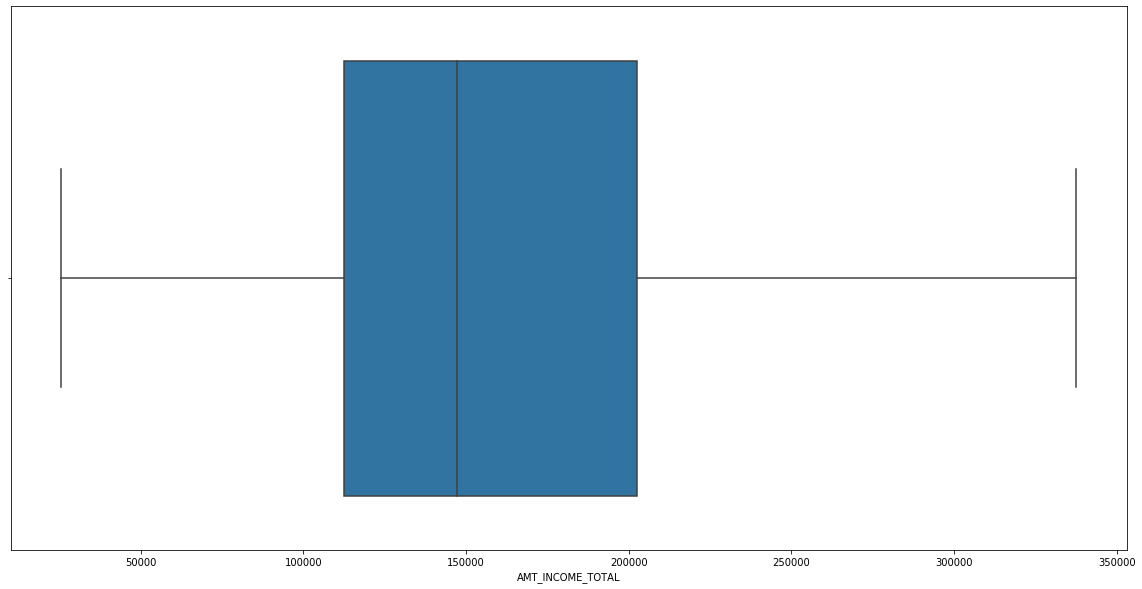

In [77]:
plt.figure(figsize =(20,10))
sns.boxplot(application_data["AMT_INCOME_TOTAL"],showfliers=False)
plt.show()

In [78]:
max(application_data["AMT_INCOME_TOTAL"])

117000000.0

In [79]:
application_data['INCOME_GROUP'] = pd.cut(application_data.AMT_INCOME_TOTAL, bins = [25000,75000,150000,225000,300000,375000,117000000], labels = ["very low income", "low income", "average income","above average income", "high income","very high income"])

In [80]:
application_data[["AMT_INCOME_TOTAL",'INCOME_GROUP']]

,AMT_INCOME_TOTAL,INCOME_GROUP
0,202500.000000,average income
1,270000.000000,above average income
2,67500.000000,very low income
3,135000.000000,low income
4,121500.000000,low income
...,...,...
307506,157500.000000,average income
307507,72000.000000,very low income
307508,153000.000000,average income
307509,171000.000000,average income


In [81]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,very low income
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,low income
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,low income

### BINNING "AMT_CREDIT" Column

In [82]:
application_data["AMT_CREDIT"].describe()

count    307511.000000
mean     599025.999706
std      402490.776996
min       45000.000000
25%      270000.000000
50%      513531.000000
75%      808650.000000
max     4050000.000000
Name: AMT_CREDIT, dtype: float64

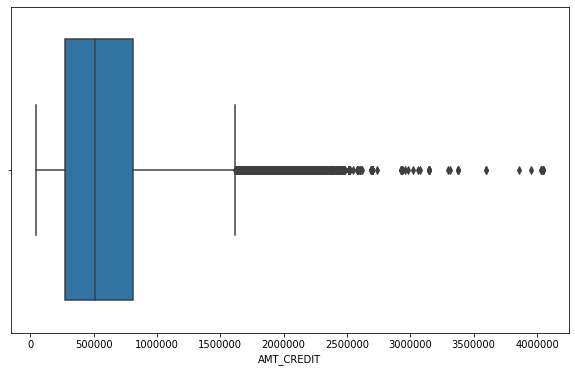

In [83]:
plt.figure(figsize =(10,6))
sns.boxplot(application_data["AMT_CREDIT"])
plt.show()

In [84]:
application_data["AMT_CREDIT"].median()

513531.0

In [85]:
max(application_data["AMT_CREDIT"])

4050000.0

In [86]:
application_data['AMT_CREDIT_CATEGORY'] = pd.cut(application_data.AMT_CREDIT, bins = [0,100000,500000,1000000,5000000], labels = ["very low credit", "low credit","medium credit", "high credit"])

In [87]:
application_data[['AMT_CREDIT_CATEGORY',"AMT_CREDIT"]]

,AMT_CREDIT_CATEGORY,AMT_CREDIT
0,low credit,406597.500000
1,high credit,1293502.500000
2,low credit,135000.000000
3,low credit,312682.500000
4,medium credit,513000.000000
...,...,...
307506,low credit,254700.000000
307507,low credit,269550.000000
307508,medium credit,677664.000000
307509,low credit,370107.000000


In [88]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,very low income,low credit
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,low income,low credit
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

### DATA IMBALANCE

In [89]:
100*application_data["TARGET"].value_counts(normalize= True)

0   91.927118
1    8.072882
Name: TARGET, dtype: float64

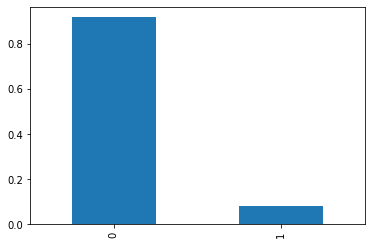

In [90]:
application_data["TARGET"].value_counts(normalize= True).plot.bar()
plt.show()

## It can be observed that data is imbalance.

In [91]:
target_1=application_data[application_data["TARGET"]== "1"]

In [92]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit
26,100031,1,Cash loans,F,N,Y,0,112500.000000,979992.000000,27076.500000,702000.000000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.000000,-1827,1,1,0,1,0,0,Cooking staff,1.000000,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.973200,0.041700,0.973200,0.041700,0.973200,0.041700,0.008500,Yes,10.000000,1.000000,10.000000,0.000000,-161.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,low income,medium credit
40,100047,1,Cash loans,M,N,Y,0,202500.000000,1193580.000000,35028.000000,855000.000000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.000000,-1029,1,1,0,1,0,0,Laborers,2.000000,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.996000,0.250000,0.996000,0.250000,0.996000,0.250000,0.146300,No,0.000000,0.000000,0.000000,0.000000,-1075.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,average income,high credit
42,100049,1,Cash loans,F,N,N,0,135000.000000,288873.000000,16258.500000,238500.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.000000,-4409,1,1,1,1,1,0,Sales staff,2.000000,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,nan,nan,nan,nan,nan,nan,nan,NaN,1.000000,0.000000,1.000000,0.000000,-1480.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,low income,low credit
81,100096,1,Cash loans,F,N,Y,0,81000.000000,252000.000000,14593.500000,252000.000000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.000000,-4199,1,0,0,1,0,0,NaN,2.000000,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,nan,nan,nan,nan,nan,nan,nan,NaN

In [93]:
target_0=application_data[application_data["TARGET"]== "0"]

In [94]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,very low income,low credit
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,low income,low credit
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,low income,medium credit
5,100008,0,Cash loans,M,N,Y,0,99000.000000,490495.500000,27517.500000,454500.000000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.000000,-477,1,1,1,1,1,0,Laborers,2.000000,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-2536.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,

  
  
 ### Correlation

In [95]:
target_0.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,-0.001475,-0.000077,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000695,0.000556,-0.000741,0.002382,-0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014471,-0.002246,0.014137,-0.002172,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,0.0

In [96]:
target_0.corr().unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,CNT_CHILDREN,-0.000716
2,SK_ID_CURR,AMT_INCOME_TOTAL,0.001739
3,SK_ID_CURR,AMT_CREDIT,-0.000342
4,SK_ID_CURR,AMT_ANNUITY,0.000068
...,...,...,...
4220,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,-0.003798
4221,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,0.019085
4222,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.004889
4223,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,0.074664


In [97]:
corr_0 = target_0.corr()
corr0_df =corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))

In [98]:
corr0_df.unstack().reset_index().dropna(subset = [0]).sort_values(by = 0, ascending = False).head(10)


,level_0,level_1,0
2374,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
2108,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018
2042,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582
2110,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988153
328,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
1978,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603
1912,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032
2044,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064
1121,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
976,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571



### Above are top 10 correlated columns for Target = 0.
#### An important insight from the analysis can be seen that "AMT_GOODS_PRICE" and "AMT_CREDIT" are highly correlated. Which means that the Amount of Loan Credit is highly correlated to the consumer good price.

In [99]:
corr_1 = target_1.corr()
corr1_df =corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))

In [100]:
corr1_df.unstack().reset_index().dropna(subset = [0]).sort_values(by = 0, ascending = False).head(10)

,level_0,level_1,0
2374,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
2108,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
2042,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124
2110,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195
1978,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594
328,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
1912,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466
2044,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073
1121,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
976,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484



### Above are top 10 correlated columns for Target = 1.
#### Same coorelation can be seen here also for "AMT_GOODS_PRICE" and "AMT_CREDIT" i.e. they are highly correlated. Which means that the Amount of Loan Credit is highly correlated to the consumer good price.



### UNIVARIATE and BIVARIATE ANALYSIS

In [101]:
application_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_15                     2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_18                     2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_17                     2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_4                      2
FLAG_EMAIL                           2
FLAG_DOCUMENT_16         

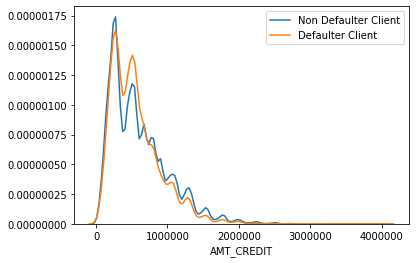

In [102]:
sns.distplot(target_0["AMT_CREDIT"], hist= False, label = "Non Defaulter Client")
sns.distplot(target_1["AMT_CREDIT"], hist = False, label= "Defaulter Client")

It can be observed that for credit amount more than 1000000, Non-defaulters are more.

In [103]:
pd.set_option("display.float_format", lambda x: '%5f'% x)

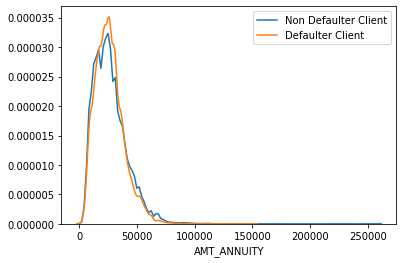

In [104]:
sns.distplot(target_0["AMT_ANNUITY"], hist= False, label = "Non Defaulter Client")
sns.distplot(target_1["AMT_ANNUITY"], hist = False, label= "Defaulter Client")


It can be observed that there are more number of defaulter for Loan Annuity amount less than 50000.

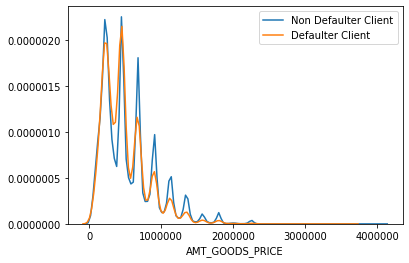

In [105]:
sns.distplot(target_0["AMT_GOODS_PRICE"], hist= False, label = "Non Defaulter Client")
sns.distplot(target_1["AMT_GOODS_PRICE"], hist = False, label= "Defaulter Client")


It can be observed that less people take loan for amount good price more than 1000000. As the loan amount increases no. of defaulters are less.

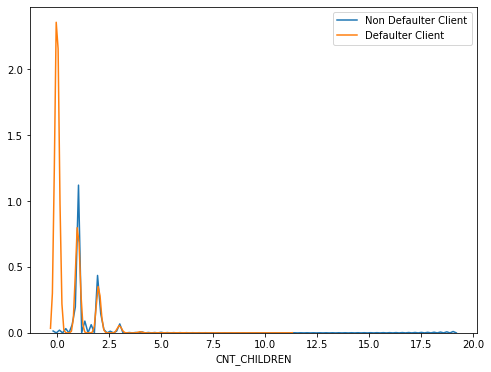

In [106]:
plt.figure(figsize=(8,6))
sns.distplot(target_0["CNT_CHILDREN"], hist= False, label = "Non Defaulter Client")
sns.distplot(target_1["CNT_CHILDREN"], hist = False, label= "Defaulter Client")

It can be observed that most of the defaulters don't have children. And this column has outlier as maximum value of children is goin upto 17 which is very rare to happen.

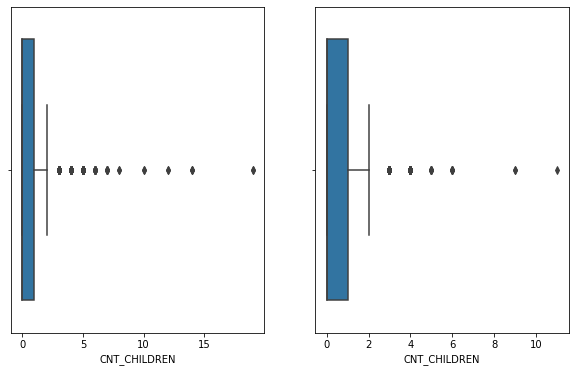

In [107]:
#Checking for outliers in CNT_CHILDREN Column
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0["CNT_CHILDREN"])
plt.subplot(1,2,2)
sns.boxplot(target_1["CNT_CHILDREN"])
plt.show()

It can be observed from the boxplot that this ccolumn have some outliers.

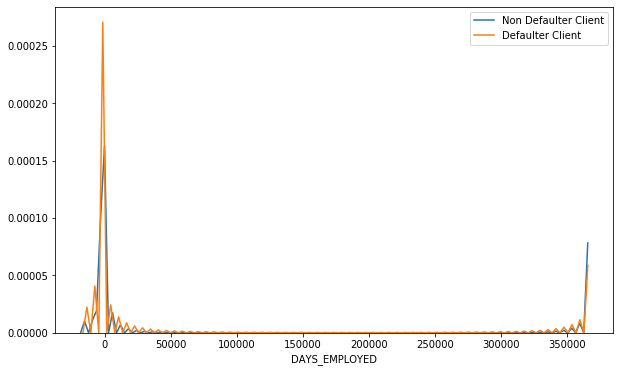

In [108]:
plt.figure(figsize =(10,6))
sns.distplot(target_0["DAYS_EMPLOYED"], hist= False, label = "Non Defaulter Client")
sns.distplot(target_1["DAYS_EMPLOYED"], hist = False, label= "Defaulter Client")

It can be observed that most of the Defaulters are not employed.

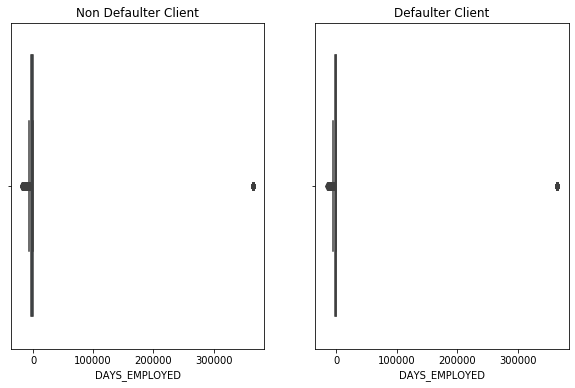

In [109]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0["DAYS_EMPLOYED"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(target_1["DAYS_EMPLOYED"])
plt.title("Defaulter Client")
plt.show()

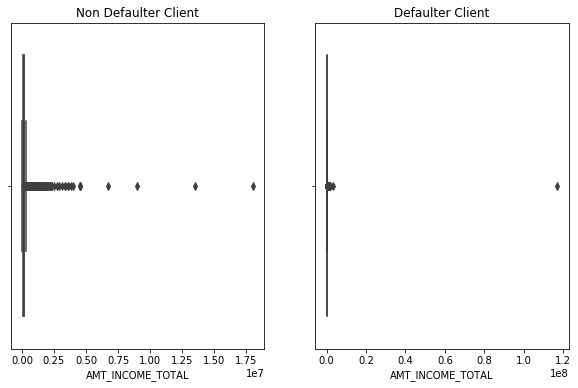

In [110]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0["AMT_INCOME_TOTAL"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(target_1["AMT_INCOME_TOTAL"])
plt.title("Defaulter Client")
plt.show()

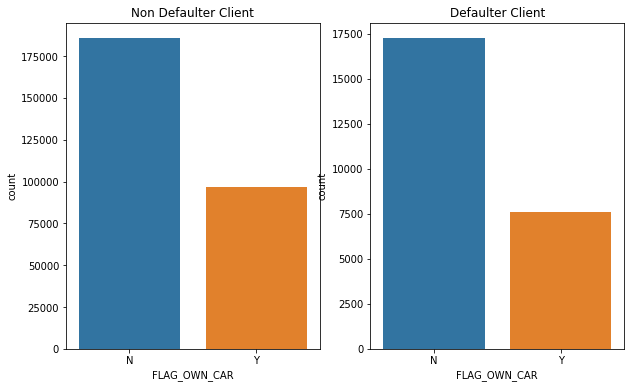

In [111]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0["FLAG_OWN_CAR"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(target_1["FLAG_OWN_CAR"])
plt.title("Defaulter Client")
plt.show()

It can be observed that people who don't have car tend to take loan. The percentage of Defaulter having car is less.

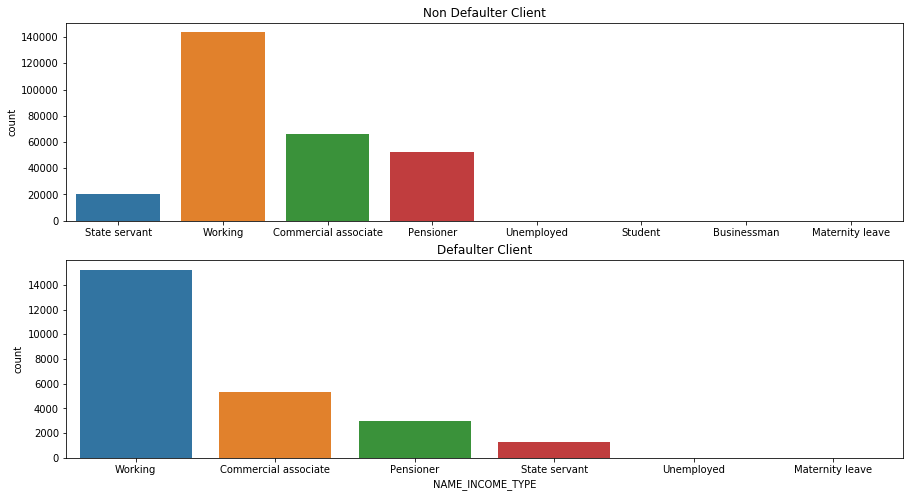

In [112]:
plt.figure(figsize =(15,8))
plt.subplot(2,1,1)
sns.countplot(target_0["NAME_INCOME_TYPE"])
plt.xlabel(None)
plt.title("Non Defaulter Client")
plt.subplot(2,1,2)
sns.countplot(target_1["NAME_INCOME_TYPE"])
plt.title("Defaulter Client")
plt.show()

The Working applicant are most likely to take the loan.
It is obserevd from the above graph Student and Businessman are most likely to pay the loan. 

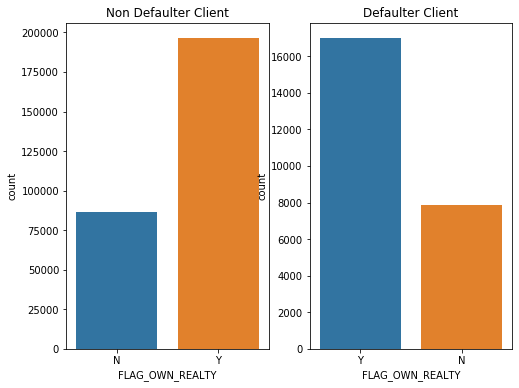

In [113]:
plt.figure(figsize =(8,6))
plt.subplot(1,2,1)
sns.countplot(target_0["FLAG_OWN_REALTY"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(target_1["FLAG_OWN_REALTY"])
plt.title("Defaulter Client")
plt.show()

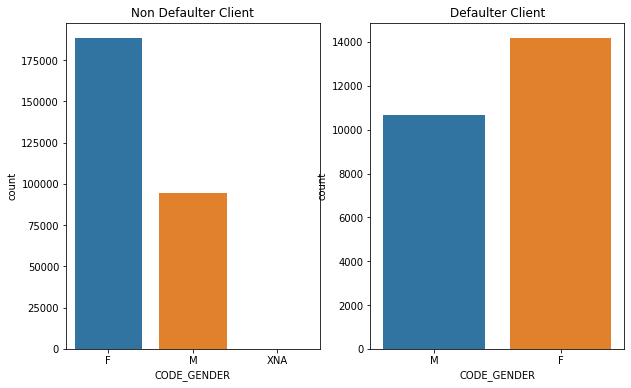

In [114]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0["CODE_GENDER"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(target_1["CODE_GENDER"])
plt.title("Defaulter Client")
plt.show()

In [115]:
#Total no. of male applicant for loan.
len(application_data[application_data["CODE_GENDER"]=="M"])

105059

In [116]:
len(target_1[target_1["CODE_GENDER"]=="M"])

10655

In [117]:
#percentage of Male Defaulter
10655/105059*100

10.141920254333279

In [118]:
len(application_data[application_data["CODE_GENDER"]=="F"])

202448

In [119]:
len(target_1[target_1["CODE_GENDER"]=="F"])

14170

In [120]:
#Percentage of female defaulter
14170/202448*100

6.999328222555916

It can be observed that the more no. of Female applicants take loan than the male applicants. But max. percentage defaulters are Male. 

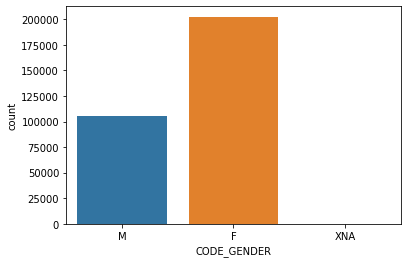

In [121]:
sns.countplot(application_data["CODE_GENDER"])
plt.show()

The graph shows that most of the applicant are Female

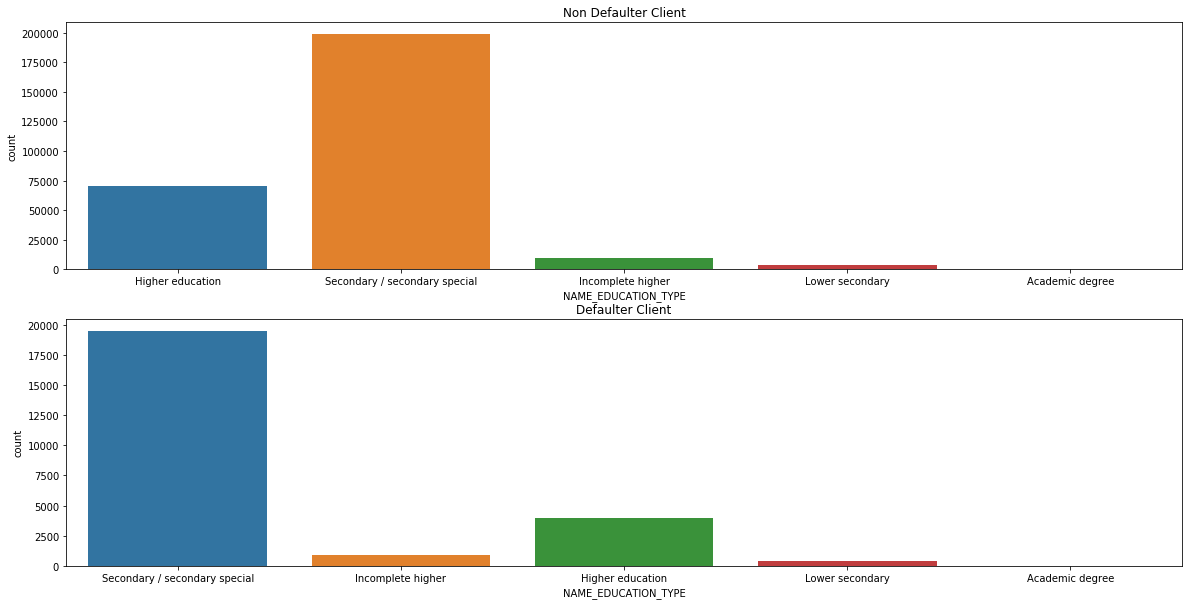

In [122]:
plt.figure(figsize =(20,10))
plt.subplot(2,1,1)
sns.countplot(target_0["NAME_EDUCATION_TYPE"])
plt.title("Non Defaulter Client")
plt.subplot(2,1,2)
sns.countplot(target_1["NAME_EDUCATION_TYPE"])
plt.title("Defaulter Client")
plt.show()

It can be observed that applicants having Secondary/secondary special education tends to take more loan.  


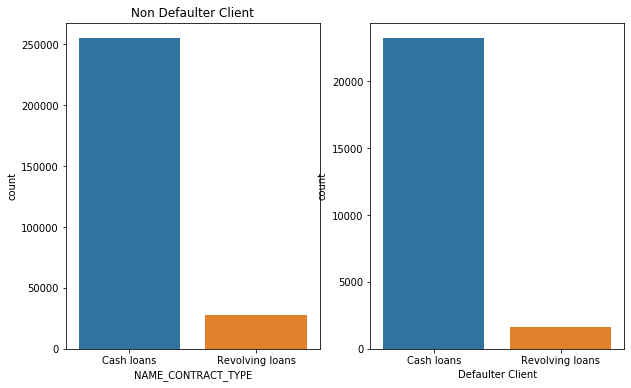

In [123]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0["NAME_CONTRACT_TYPE"])
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(target_1["NAME_CONTRACT_TYPE"])
plt.xlabel("Defaulter Client")
plt.show()

It can be observed from the above graph that most of the applicants opt for Cash Loans.

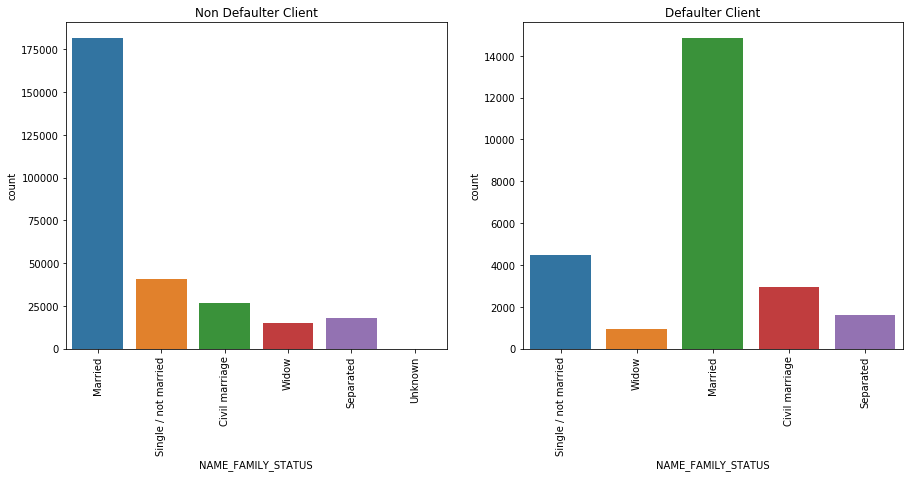

In [124]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(target_0["NAME_FAMILY_STATUS"])
plt.title("Non Defaulter Client")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.title("Defaulter Client")
plt.show()

It can be observed that married people tend to take more loans than other category.

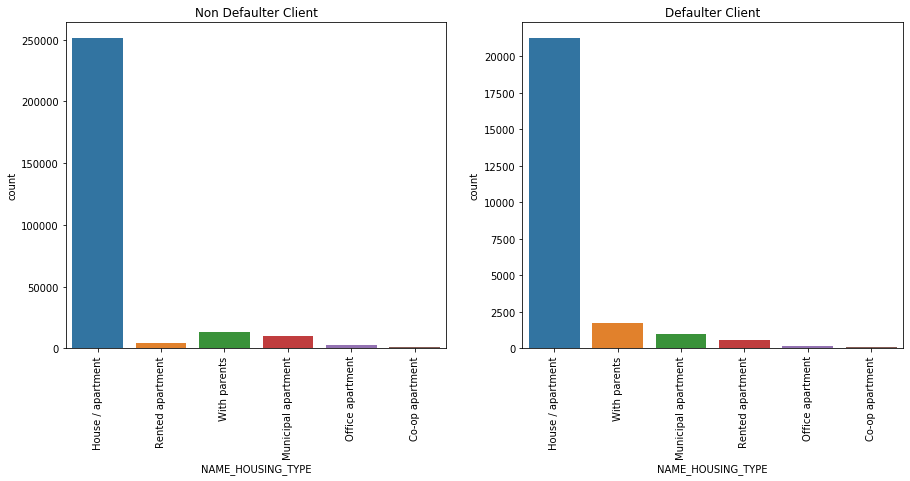

In [125]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(target_0["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(target_1["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.title("Defaulter Client")
plt.show()

It can be observed that most of the applicant are from House/apartment category who are most likely to take loan.  
It can also be observed from the graph that applicant from rented category are more Defaulter





### BIVARIATE ANALYSIS

In [126]:
application_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_15                     2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_18                     2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_17                     2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_4                      2
FLAG_EMAIL                           2
FLAG_DOCUMENT_16         

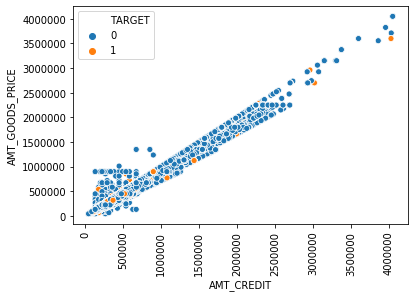

In [127]:
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=application_data,hue="TARGET")
plt.xticks(rotation = 90)
plt.show()

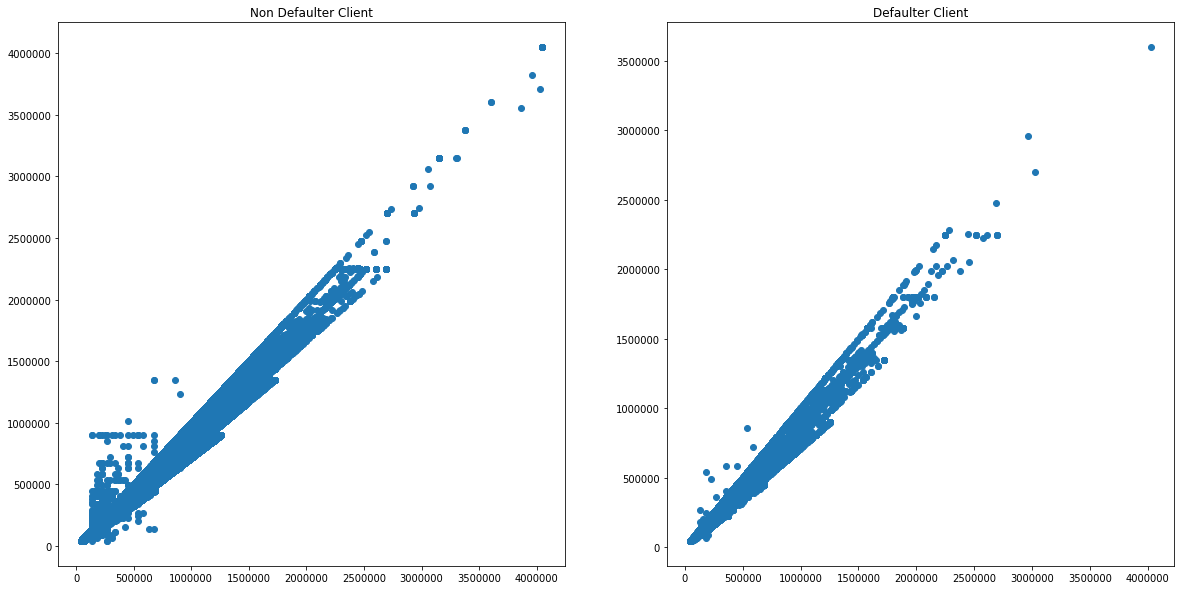

In [128]:
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
plt.scatter(target_0["AMT_CREDIT"],target_0["AMT_GOODS_PRICE"] )
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(target_1["AMT_CREDIT"],target_1["AMT_GOODS_PRICE"] )
plt.title("Defaulter Client")
plt.show()

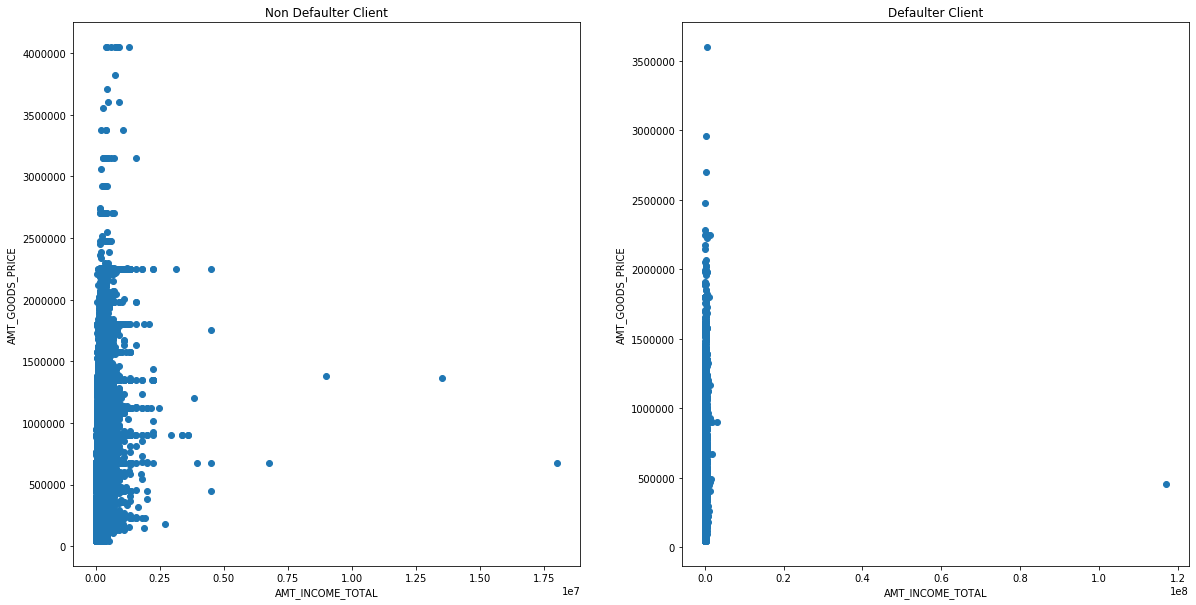

In [129]:
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
plt.scatter(target_0["AMT_INCOME_TOTAL"],target_0["AMT_GOODS_PRICE"] )
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(target_1["AMT_INCOME_TOTAL"],target_1["AMT_GOODS_PRICE"] )
plt.title("Defaulter Client")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_GOODS_PRICE")
plt.show()

It can be observed that higher income applicant are less likely to take loan for "Goods"

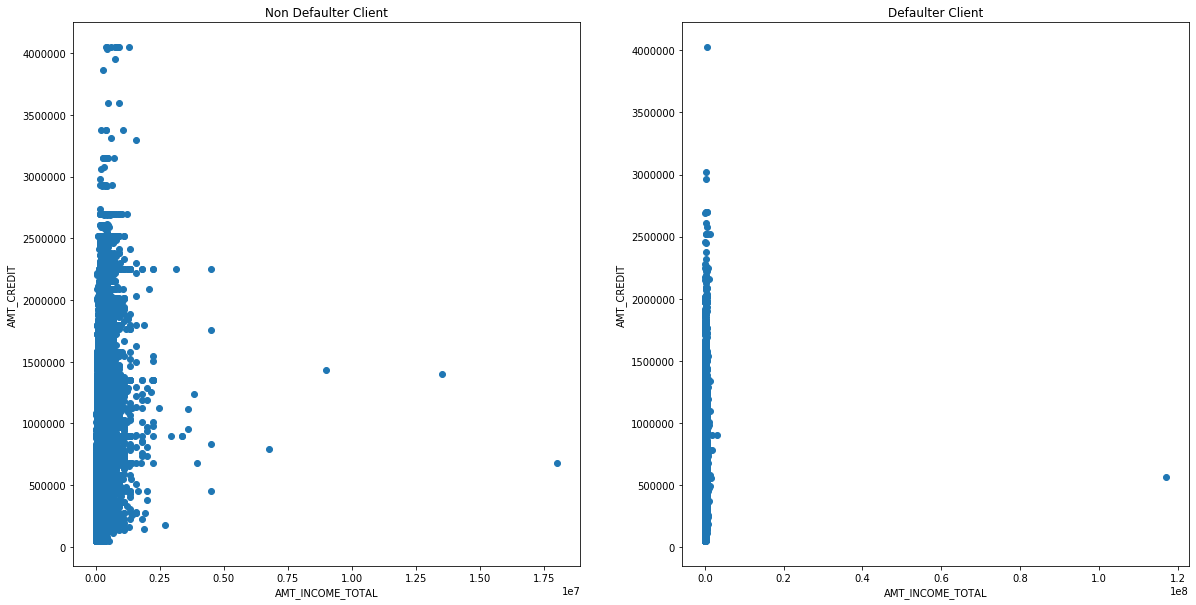

In [130]:
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
plt.scatter(target_0["AMT_INCOME_TOTAL"],target_0["AMT_CREDIT"] )
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("Non Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(target_1["AMT_INCOME_TOTAL"],target_1["AMT_CREDIT"] )
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("Defaulter Client")
plt.show()

It can be observed that applicant having more income are more likely to pay credit amount.

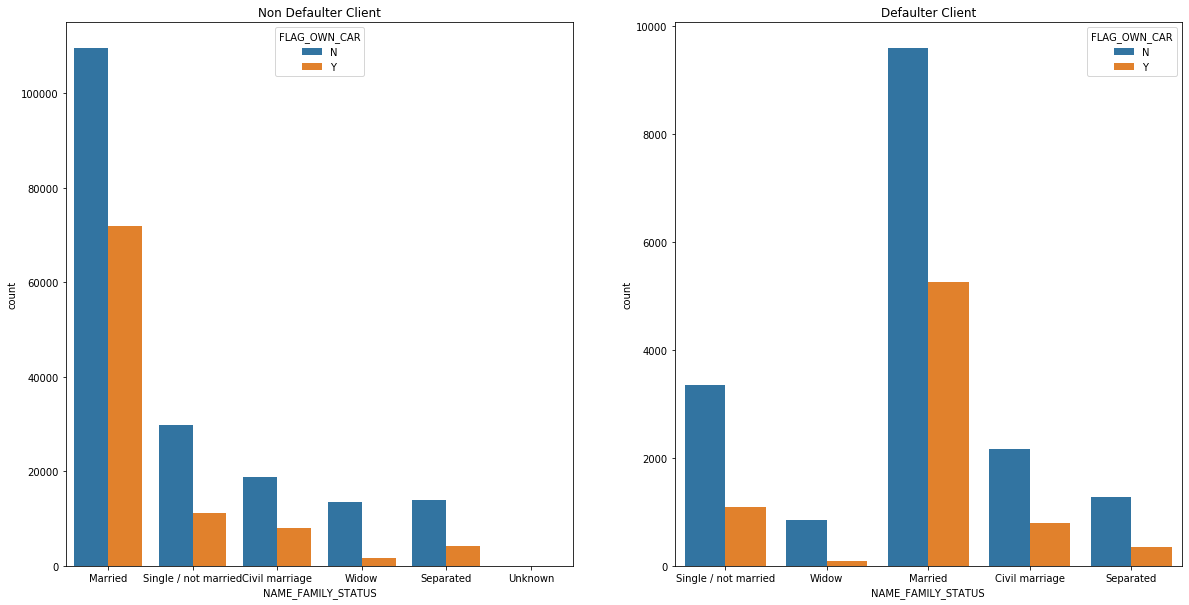

In [131]:
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "FLAG_OWN_CAR", data = target_0 )
plt.title("Non Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "FLAG_OWN_CAR", data = target_1 )
plt.title("Defaulter Client")
plt.show()

It can be observed that applicant from married category and not having cars are likely to take loans.

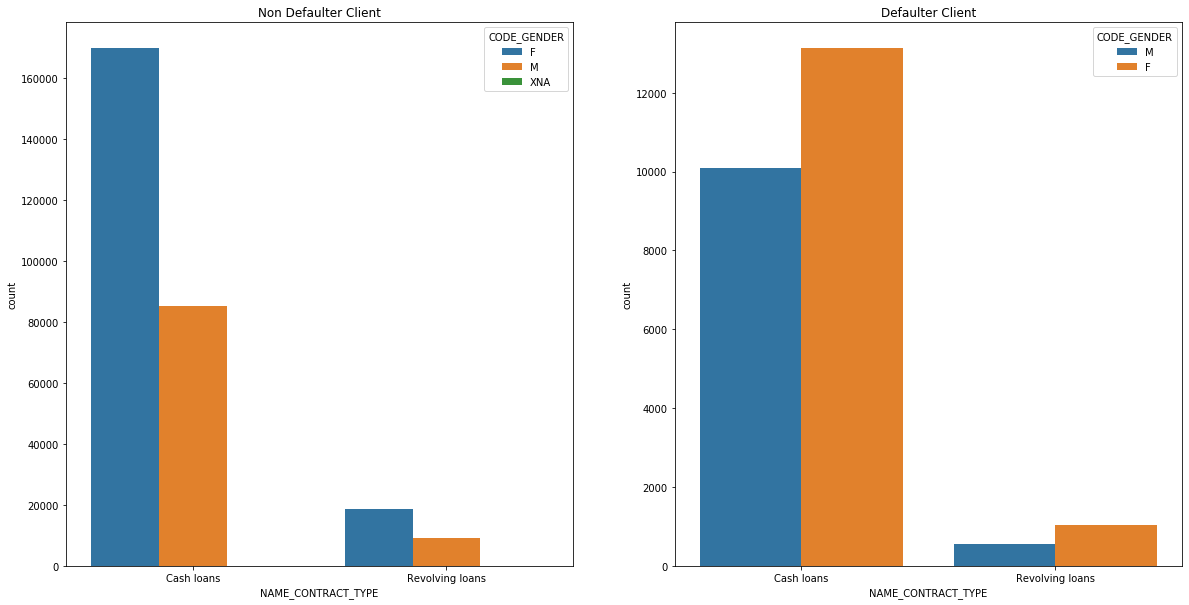

In [132]:
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "CODE_GENDER", data = target_0 )
plt.title("Non Defaulter Client")



plt.subplot(1,2,2)
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "CODE_GENDER", data = target_1 )
plt.title("Defaulter Client")
plt.show()

It can be infer from the above graph that Male category applicant taking cash loan are more likely to be defaulters incomparison to Female.

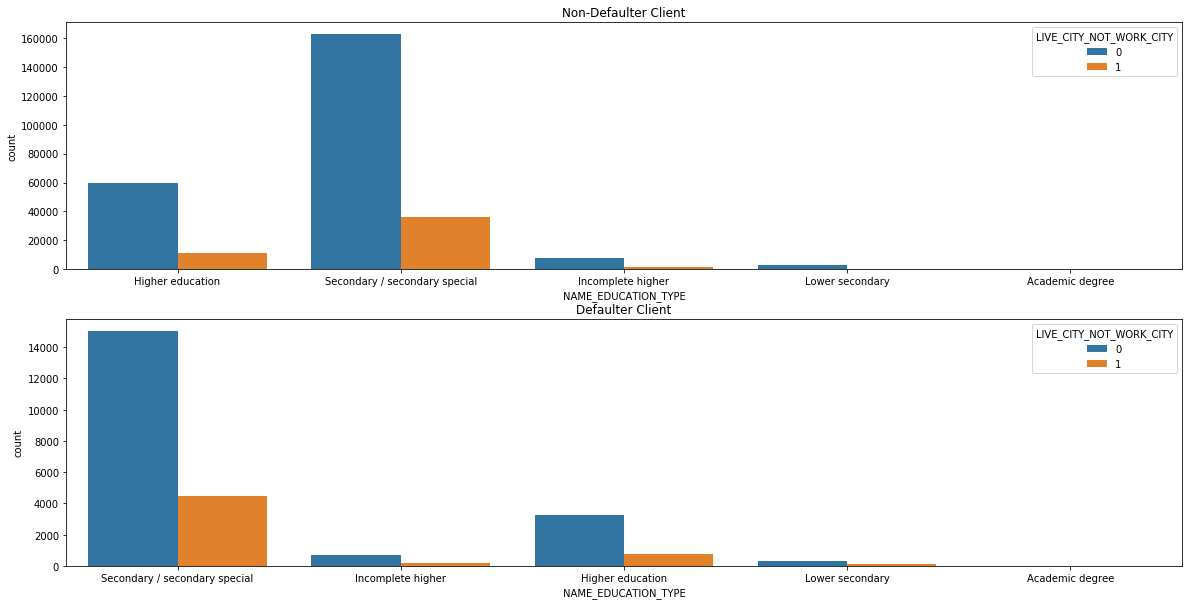

In [133]:
plt.figure(figsize =(20,10))
plt.subplot(2,1,1)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "LIVE_CITY_NOT_WORK_CITY", data = target_0 )

plt.title("Non-Defaulter Client")


plt.subplot(2,1,2)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "LIVE_CITY_NOT_WORK_CITY", data = target_1 )
plt.title("Defaulter Client")
plt.show()

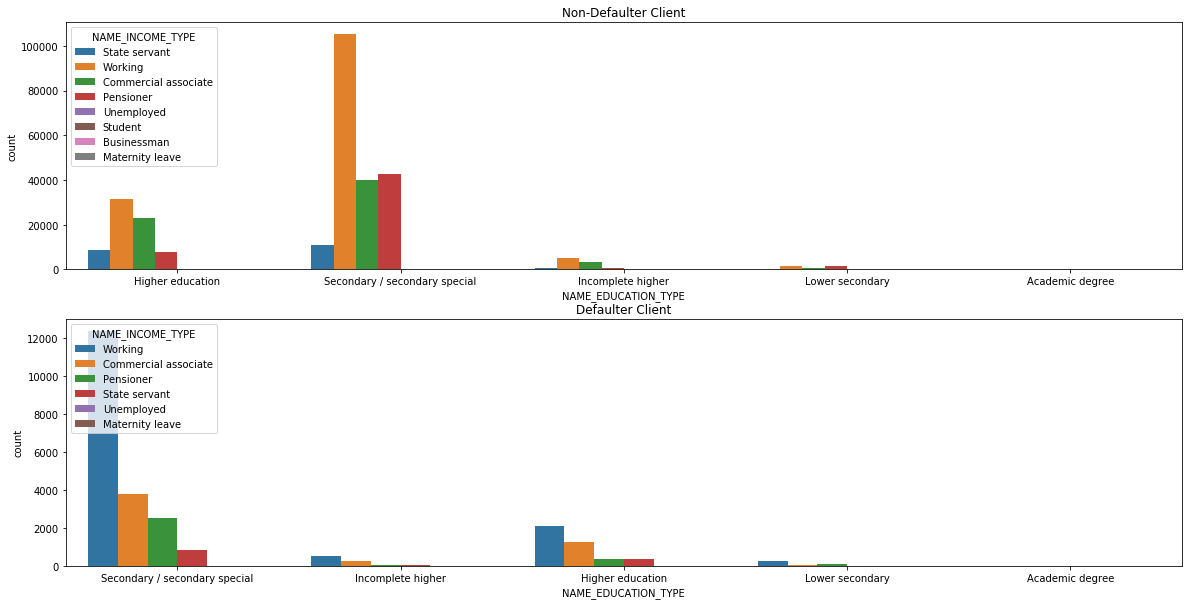

In [134]:
plt.figure(figsize =(20,10))
plt.subplot(2,1,1)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "NAME_INCOME_TYPE", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(2,1,2)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "NAME_INCOME_TYPE", data = target_1 )
plt.title("Defaulter Client")
plt.show()

State Servant having Higher Education are less likely to be a defaulter.

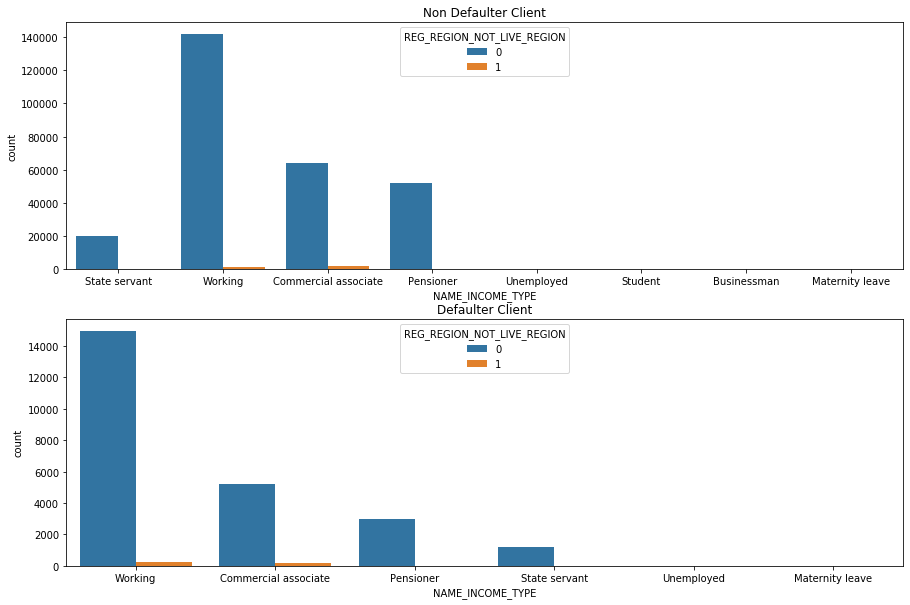

In [135]:
plt.figure(figsize =(15,10))
plt.subplot(2,1,1)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "REG_REGION_NOT_LIVE_REGION", data = target_0 )
plt.title("Non Defaulter Client")


plt.subplot(2,1,2)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "REG_REGION_NOT_LIVE_REGION", data = target_1 )
plt.title("Defaulter Client")
plt.show() 

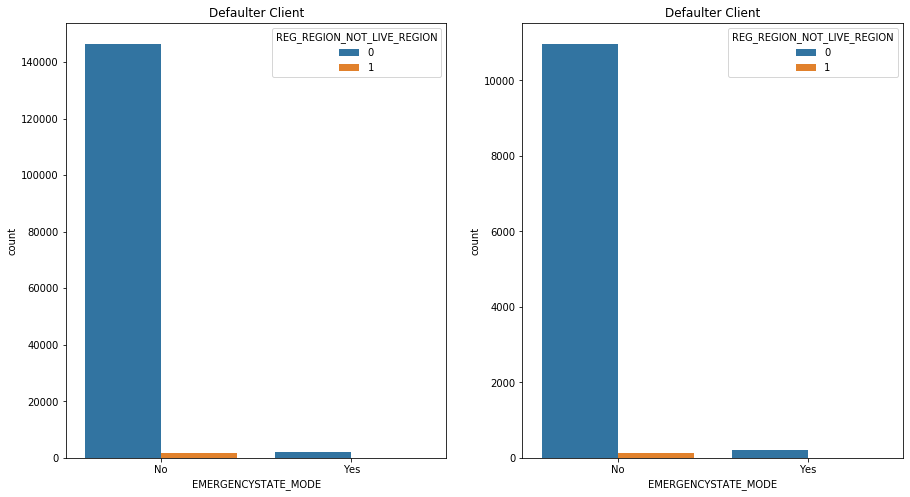

In [136]:
plt.figure(figsize =(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "EMERGENCYSTATE_MODE", hue = "REG_REGION_NOT_LIVE_REGION", data = target_0 )
plt.title("Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "EMERGENCYSTATE_MODE", hue = "REG_REGION_NOT_LIVE_REGION", data = target_1 )
plt.title("Defaulter Client")
plt.show() 

In [137]:
application_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_15                     2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_18                     2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_17                     2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_4                      2
FLAG_EMAIL                           2
FLAG_DOCUMENT_16         

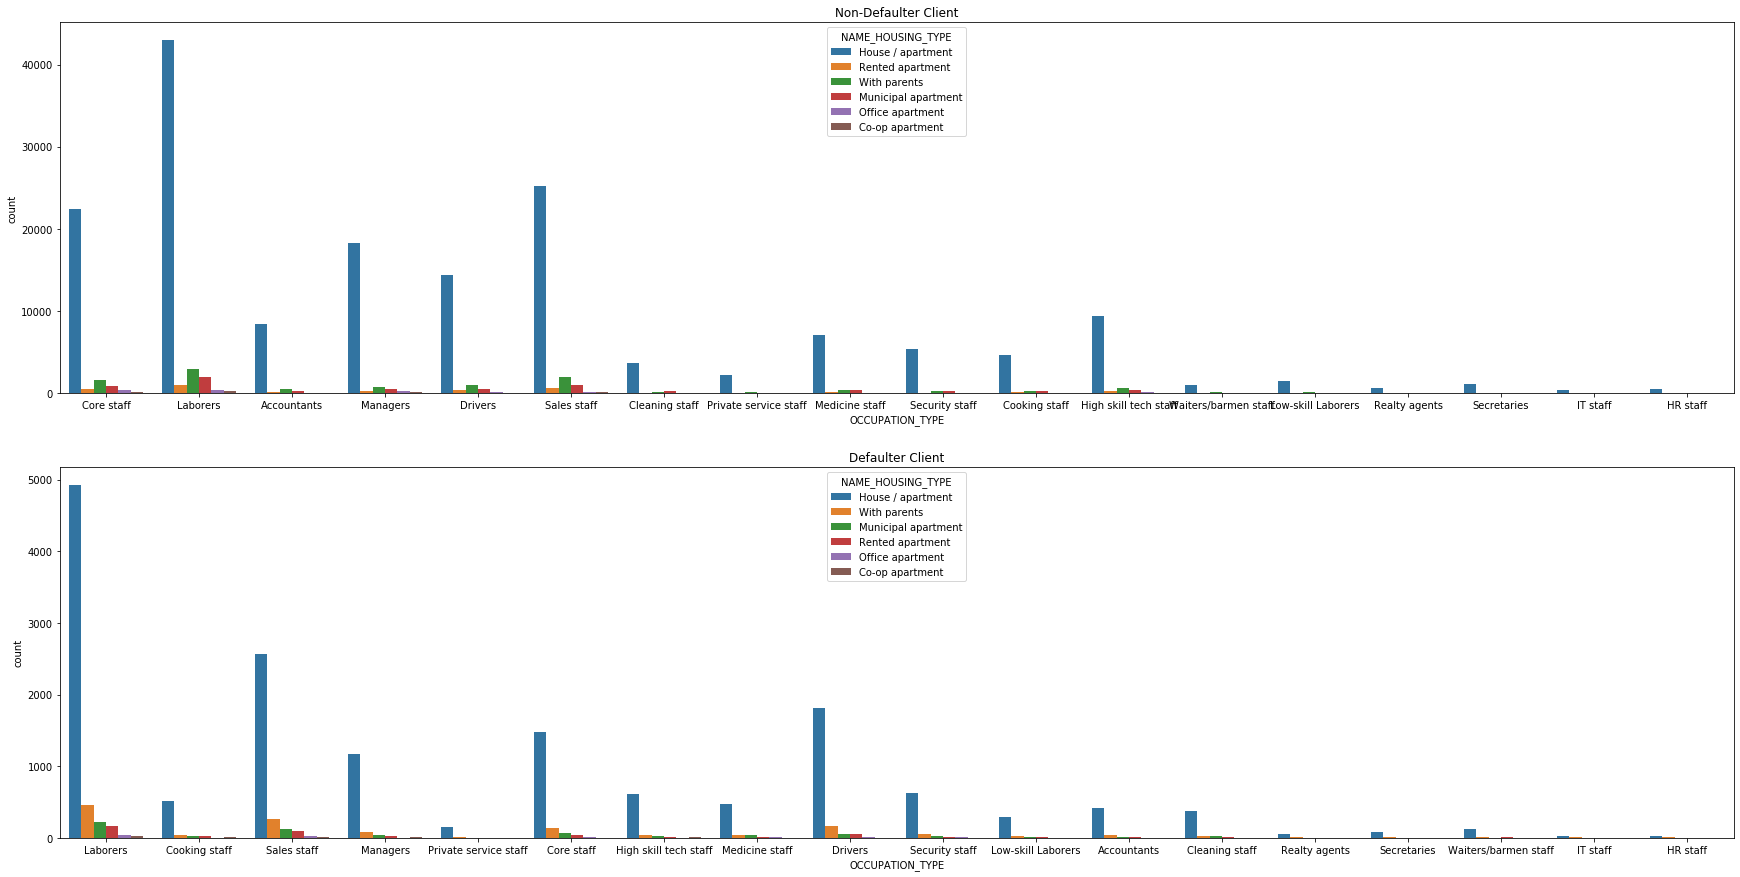

In [138]:
plt.figure(figsize =(30,15))
plt.subplot(2,1,1)
sns.countplot(x =  "OCCUPATION_TYPE", hue = "NAME_HOUSING_TYPE", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(2,1,2)
sns.countplot(x = "OCCUPATION_TYPE", hue = "NAME_HOUSING_TYPE", data = target_1 )
plt.title("Defaulter Client")
plt.show()

Following are the observation from the above graph:
1- Accountants and Cleaning Staff occupation type applicant who are living in any housing type are Non-Defaulters.
2- Cooking Staff and High Skill Tech Staff who are living in any housing type are Defaulters.

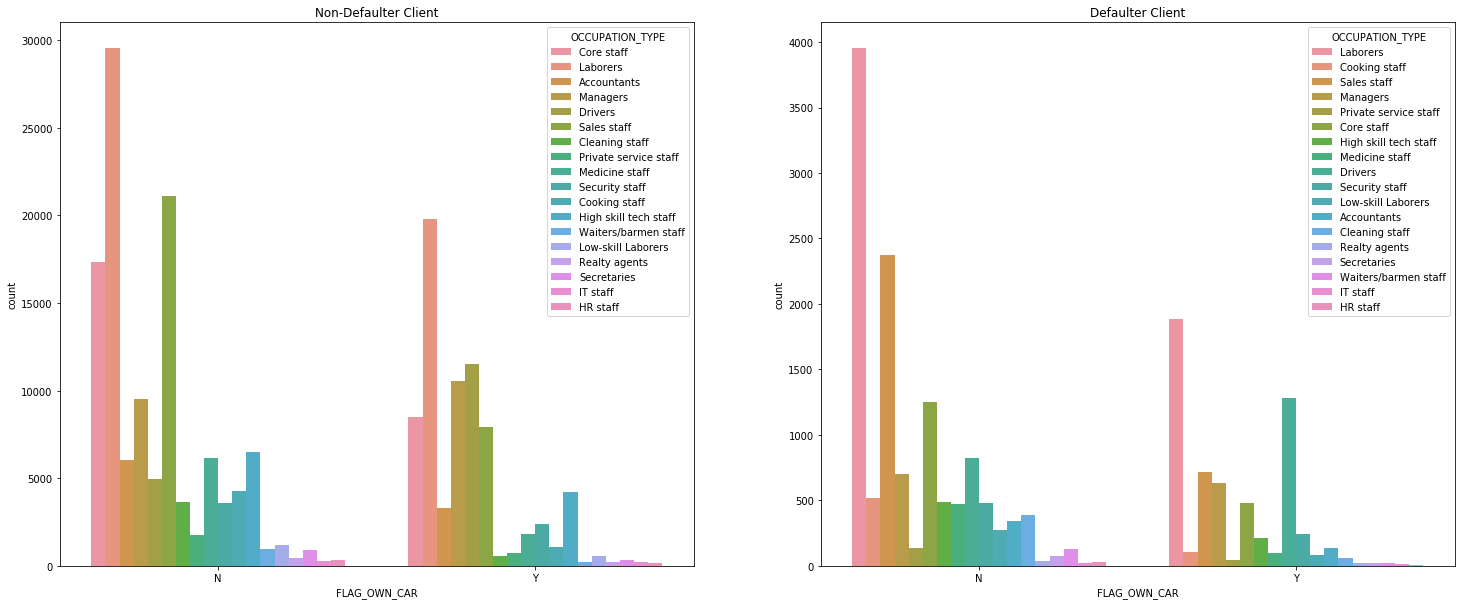

In [139]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "OCCUPATION_TYPE", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "OCCUPATION_TYPE", data = target_1 )
plt.title("Defaulter Client")
plt.show()

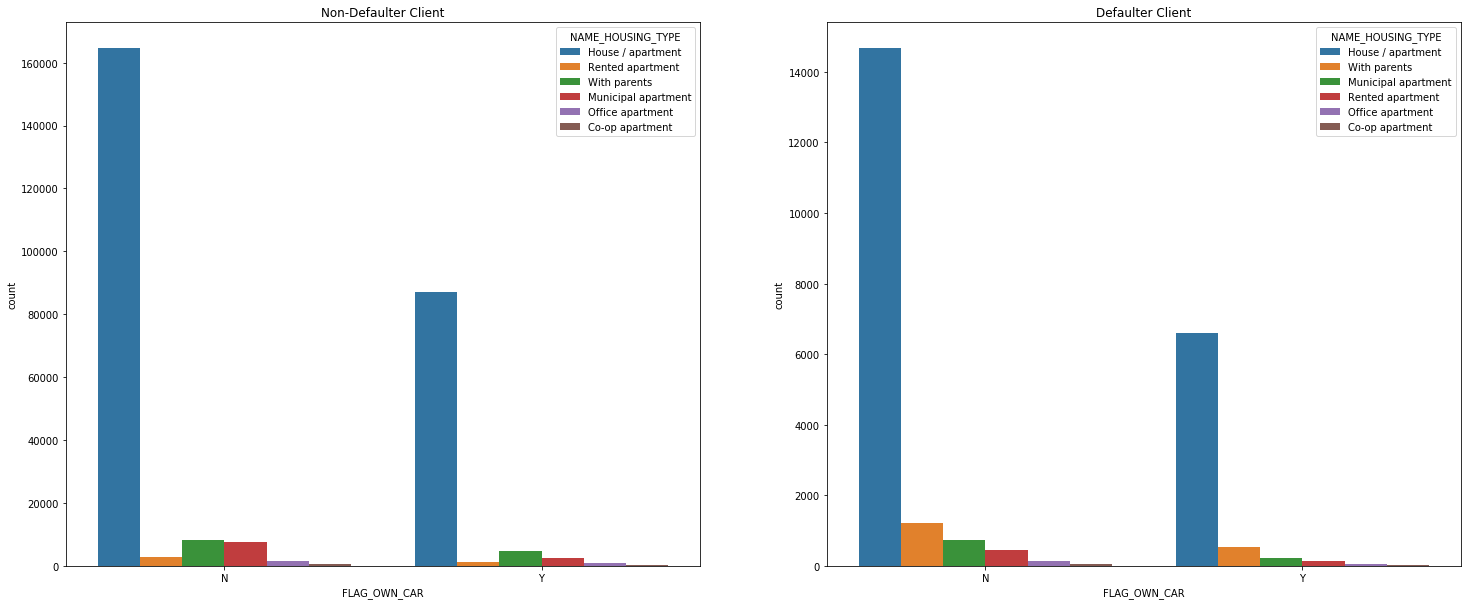

In [140]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_HOUSING_TYPE", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_HOUSING_TYPE", data = target_1 )
plt.title("Defaulter Client")
plt.show()

Applicant who don't own car and living in housing/apartment are more likely to take loan.

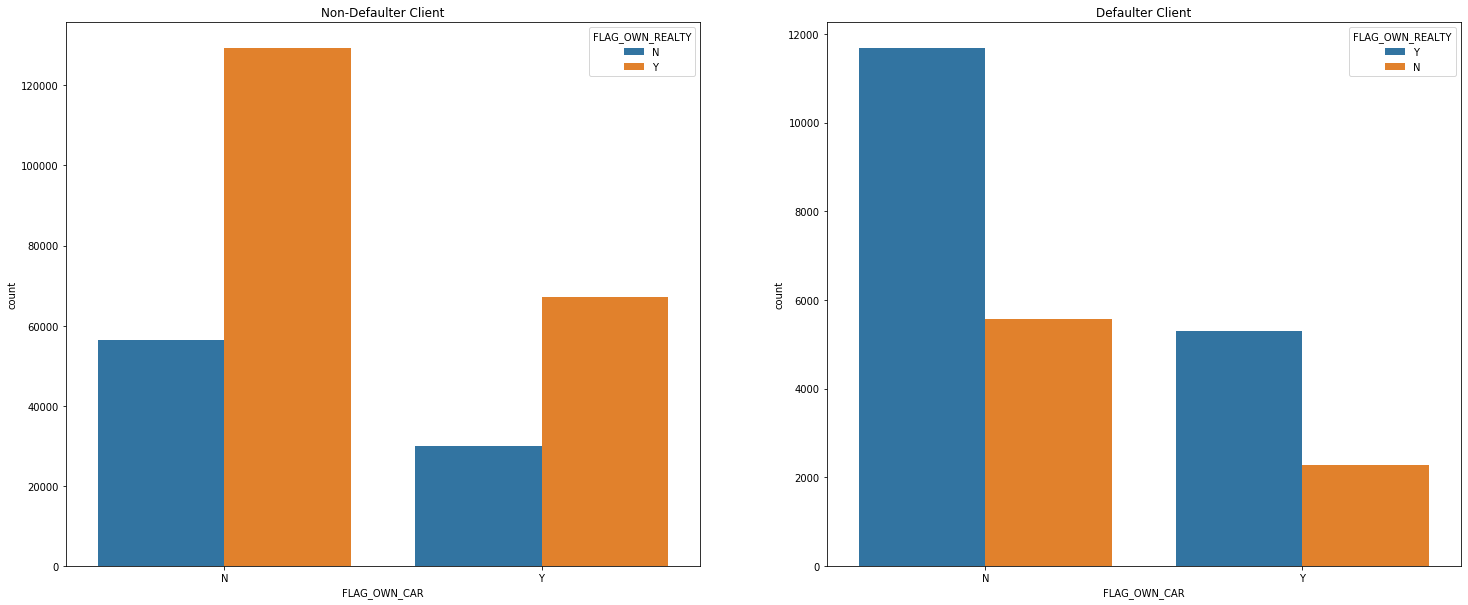

In [141]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY", data = target_1 )
plt.title("Defaulter Client")
plt.show()

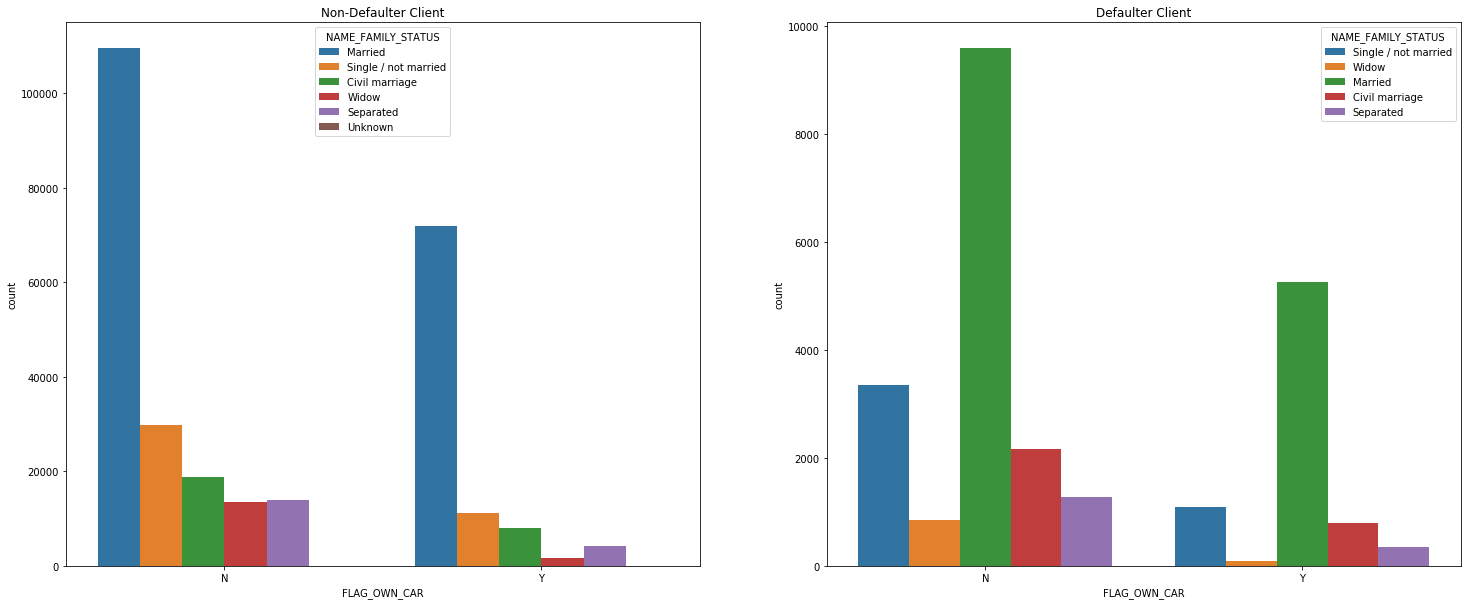

In [142]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_FAMILY_STATUS", data = target_0 )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_FAMILY_STATUS", data = target_1 )
plt.title("Defaulter Client")
plt.show()

It is observed that married applicant who don't own a car are most likely to be the defaulter.

In [143]:
application_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_15                     2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_18                     2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_17                     2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_4                      2
FLAG_EMAIL                           2
FLAG_DOCUMENT_16         

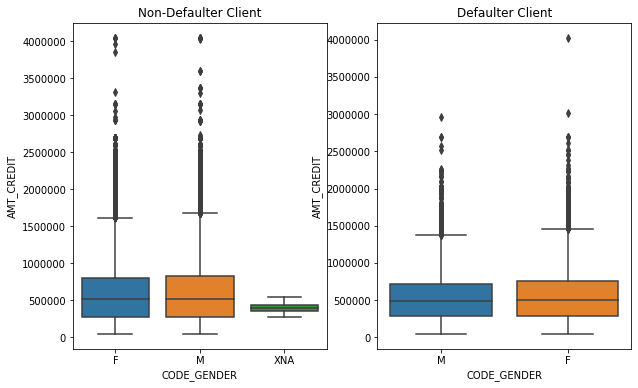

In [144]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

sns.boxplot(x = "CODE_GENDER", y= "AMT_CREDIT", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "CODE_GENDER", y= "AMT_CREDIT", data= target_1)
plt.title("Defaulter Client")
plt.show()

Median value of amt-credit irrespective of the gender is 5,00,000.

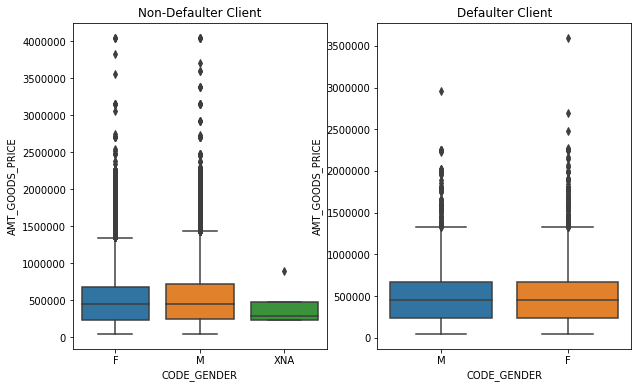

In [145]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "CODE_GENDER", y= "AMT_GOODS_PRICE", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "CODE_GENDER", y= "AMT_GOODS_PRICE", data= target_1)
plt.title("Defaulter Client")
plt.show()

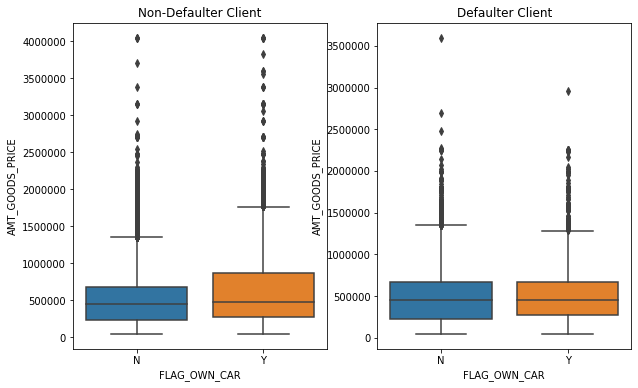

In [146]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_CAR", y= "AMT_GOODS_PRICE", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_CAR", y= "AMT_GOODS_PRICE", data= target_1)
plt.title("Defaulter Client")
plt.show()

It can be observed that more percentage of people who have car and took loan for Goods amount more than 5,00,000 are likely to pay the loan.
And applicant who don't owna car and took loan for Goods amount less than 500000 are less liable to pay the loan.

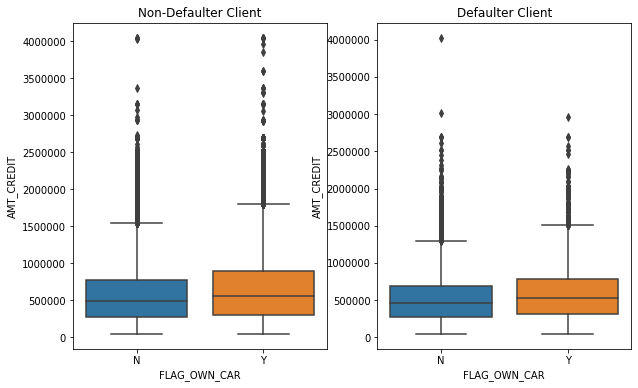

In [147]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_CAR", y= "AMT_CREDIT", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_CAR", y= "AMT_CREDIT", data= target_1)
plt.title("Defaulter Client")
plt.show()

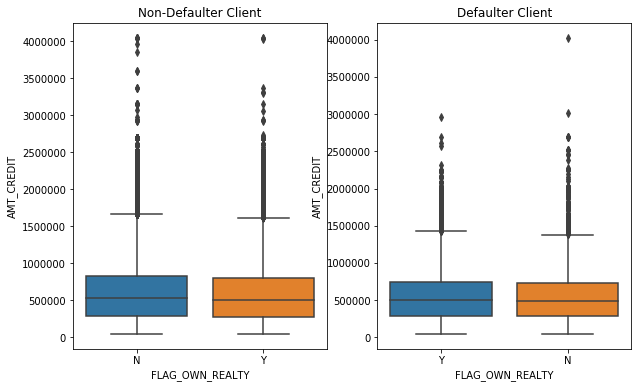

In [148]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "AMT_CREDIT", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "AMT_CREDIT", data= target_1)
plt.title("Defaulter Client")
plt.show()

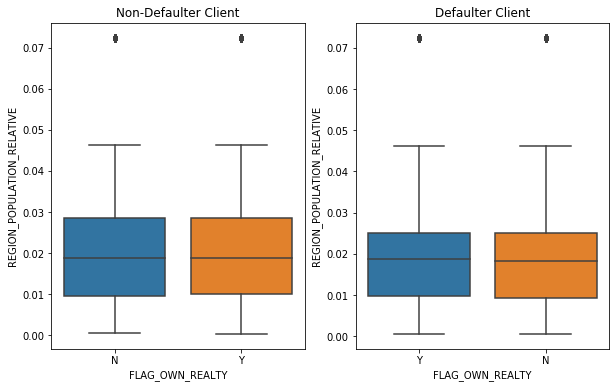

In [149]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "REGION_POPULATION_RELATIVE", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "REGION_POPULATION_RELATIVE", data= target_1)
plt.title("Defaulter Client")
plt.show()

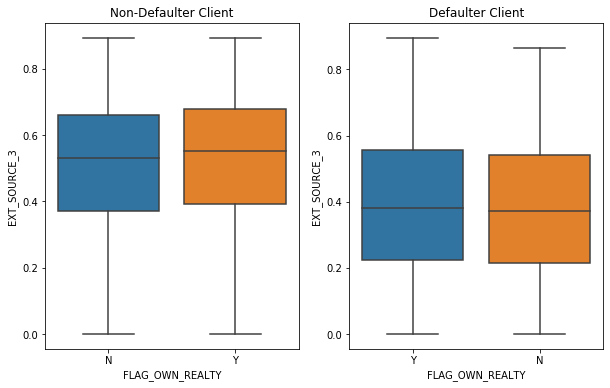

In [150]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "EXT_SOURCE_3", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_REALTY", y= "EXT_SOURCE_3", data= target_1)
plt.title("Defaulter Client")
plt.show()

It can be observed that applicant who's EXT_SOURCE_3 rating is more than 0.4 are more likely to pay the loan.

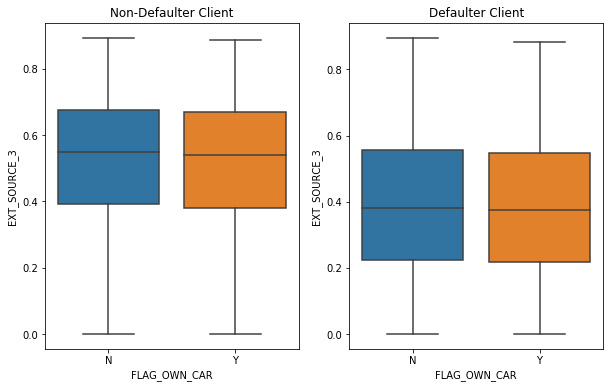

In [151]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "FLAG_OWN_CAR", y= "EXT_SOURCE_3", data= target_0)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "FLAG_OWN_CAR", y= "EXT_SOURCE_3", data= target_1)
plt.title("Defaulter Client")
plt.show()



MERGE THE PREVIOUS DATA SET



In [152]:
#Reading previous dataset
previous_data= pd.read_csv("D:\\Data Science\\EDA Credit Risk Analysis\\previous_application.csv")

In [153]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [154]:
#merged previous dataset with applicant dataset
app_prev_data = pd.merge(application_data, previous_data, how ="inner", on ="SK_ID_CURR")

In [155]:
app_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,0.000000,179055.000000,SATURDAY,9,Y,1,0.000000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,nan,900000.000000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.00

In [156]:
app_prev_data.shape

(1413701, 119)

In [157]:
app_prev_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413608.000000,1412493.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1411880.000000,1171859.000000,729019.000000,715193.000000,729019.000000,715193.000000,729019.000000,715193.000000,736160.000000,1410555.000000,1410555.000000,1410555.000000,1410555.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1413701.000000,1250074.000000,1250074.000000,1250074.000000,1250074.000000,1250074.000000,1250074.000000,1413701.000000,1106483.000000,1413701.000000,1413700.000000,664161.000000,1094176.000000,1413701.000000,1413701.000000,664161.000000,4791.000000,4791.000000,1413701.000000,1413701.000000,1106488.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,278481.287512,0.404893,173316.043724,587553.672718,27017.015541,527718.592725,0.020750,-16321.052225,68702.027038,-5003.232866,-3034.563127,0.182258,0.999245,0.282875,0.072429,2.150501,2.059638,2.037603,11.984329,0.012073,0.043967,0.036048,0.073605,0.222148,0.174060,0.511428,0.489699,0.977235,0.222317,0.976515,0.218556,0.977220,0.221945,0.099922,1.544176,0.154044,1.526303,0.108043,-1084.700686,0.000071,0.738560,0.000076,0.013696,0.089423,0.000213,0.074425,0.003182,0.000056,0.001703,0.000001,0.001784,0.001429,0.000657,0.006006,0.000142,0.004196,0.000399,0.000367,0.000224,0.006203,0.006817,0.038566,0.301373,0.361539,2.912612,1922744.330612,15837.184952,175243.593711,196354.086119,6655.317185,226451.191283,12.478929,0.996432,0.080175,0.189436,0.771284,-880.367039,314.987811,16.051936,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,102811.788043,0.717345,198573.372016,384917.331385,13951.164803,353246.491860,0.013347,4344.557089,145277.704778,3551.050912,1507.376375,0.386058,0.027462,0.450396,0.259197,0.900679,0.495780,0.488643,3.232181,0.109213,0.205021,0.186410,0.261128,

In [158]:
app_prev_data["NAME_CONTRACT_STATUS"].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [159]:
#dividing the dataframe for target value == 1
defaulter=app_prev_data[app_prev_data["TARGET"]== "1"]

In [160]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,0.000000,179055.000000,SATURDAY,9,Y,1,0.000000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
161,100047,1,Cash loans,M,N,Y,0,202500.000000,1193580.000000,35028.000000,855000.000000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.000000,-1029,1,1,0,1,0,0,Laborers,2.000000,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.996000,0.250000,0.996000,0.250000,0.996000,0.250000,0.146300,No,0.000000,0.000000,0.000000,0.000000,-1075.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,average income,high credit,1472630,Revolving loans,22500.000000,0.000000,450000.000000,nan,nan,SATURDAY,14,Y,1,nan,nan,nan,XAP,Approved,-1172,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.000000,XNA,Card X-Sell,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,0.000000
162,100047,1,Cash loans,M,N,Y,0,202500.000000,1193580.000000,

In [161]:
#dividing the dataframe for target value == 0
good_client=app_prev_data[app_prev_data["TARGET"]== "0"]

In [162]:
good_client.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,nan,900000.000000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit,2636178,Consumer loans,64567.665000,337500.000000,348637.500000,0.000000,337500.000000,SUNDAY,17,Y,1,0.000000,nan,nan,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.000000,middle,POS industry with interest,365243.000000,-797.000000,-647.000000,-647.000000,-639.000000,0.000000
3,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,Stat

In [163]:
#identifying contintinous and categorical columns.
app_prev_data.nunique().sort_values()

FLAG_MOBIL                            1
FLAG_DOCUMENT_6                       2
LIVE_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_LIVE_CITY                2
REG_CITY_NOT_WORK_CITY                2
LIVE_CITY_NOT_WORK_CITY               2
EMERGENCYSTATE_MODE                   2
FLAG_DOCUMENT_2                       2
FLAG_DOCUMENT_3                       2
FLAG_DOCUMENT_4                       2
FLAG_DOCUMENT_5                       2
FLAG_DOCUMENT_7                       2
FLAG_DOCUMENT_8                       2
FLAG_DOCUMENT_9                       2
FLAG_DOCUMENT_10                      2
FLAG_DOCUMENT_11                      2
FLAG_DOCUMENT_12                      2
FLAG_DOCUMENT_13                      2
FLAG_DOCUMENT_14                      2
FLAG_DOCUMENT_15                      2
FLAG_DOCUMENT_16                      2
FLAG_DOCUMENT_17                      2
FLAG_DOCUMENT_18                      2
FLAG_DOCUMENT_19                      2
FLAG_DOCUMENT_20                      2


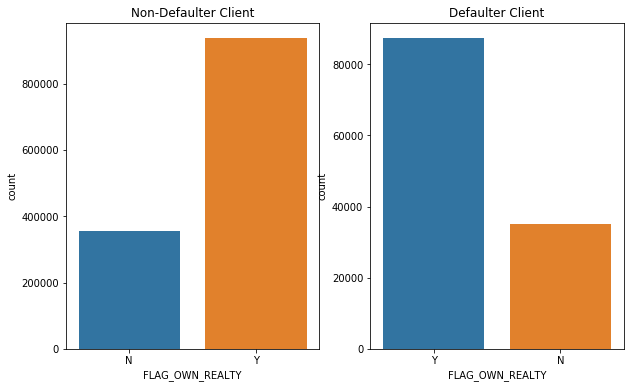

In [164]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(good_client["FLAG_OWN_REALTY"])
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(defaulter["FLAG_OWN_REALTY"])
plt.title("Defaulter Client")
plt.show()

Applicant who own a house or a flat tends to take loan.

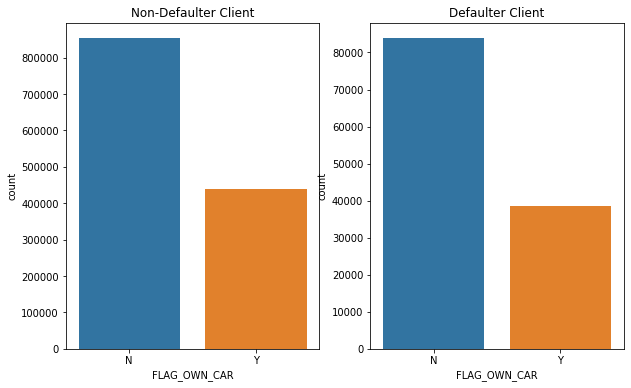

In [165]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(good_client["FLAG_OWN_CAR"])
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(defaulter["FLAG_OWN_CAR"])
plt.title("Defaulter Client")
plt.show()

Applicant who don't own a car are more likely to take loan.

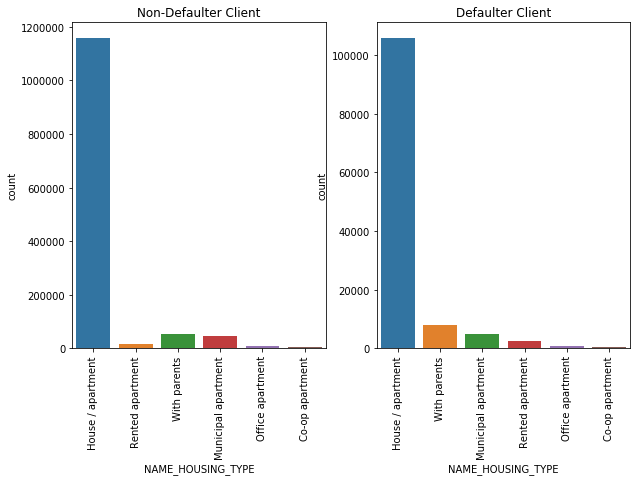

In [166]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(good_client["NAME_HOUSING_TYPE"])
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(defaulter["NAME_HOUSING_TYPE"])
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

It can be observed that the applicant who live in rented appartment are most likely to be defaulter.

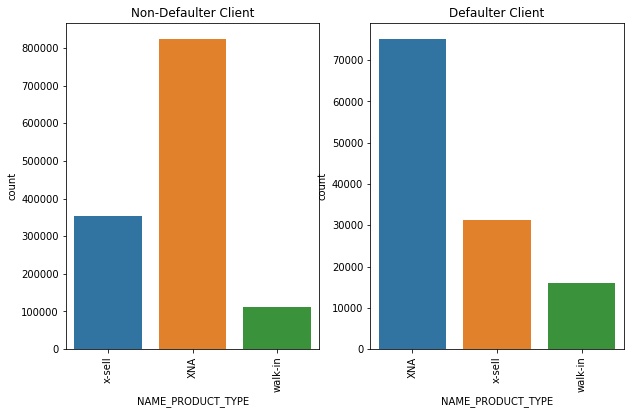

In [167]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(good_client["NAME_PRODUCT_TYPE"])
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(defaulter["NAME_PRODUCT_TYPE"])
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

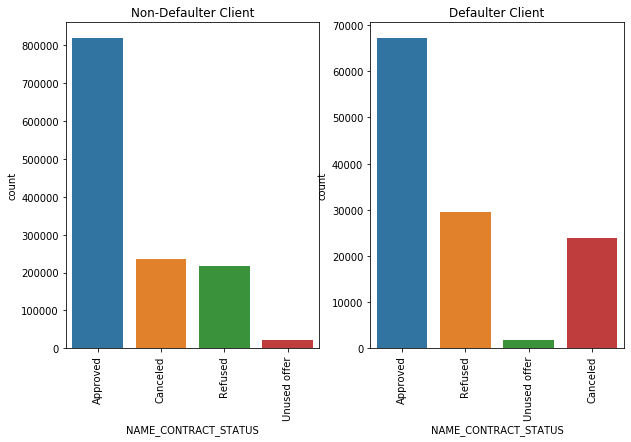

In [168]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(good_client["NAME_CONTRACT_STATUS"])
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.countplot(defaulter["NAME_CONTRACT_STATUS"])
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

The applicant whose previous application status was refused tend to be defaulter.

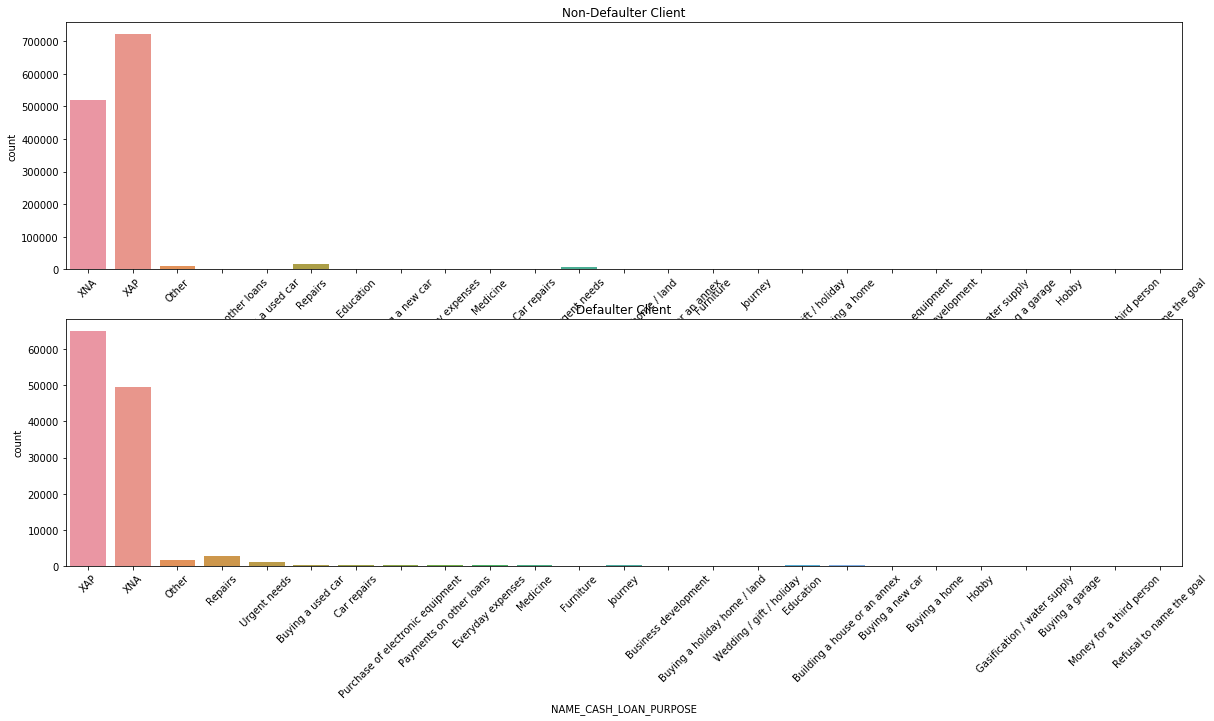

In [169]:
plt.figure(figsize =(20,10))
plt.subplot(2,1,1)
sns.countplot(good_client["NAME_CASH_LOAN_PURPOSE"])
plt.xticks(rotation =45)
plt.title("Non-Defaulter Client")
plt.subplot(2,1,2)
sns.countplot(defaulter["NAME_CASH_LOAN_PURPOSE"])
plt.xticks(rotation =45)
plt.title("Defaulter Client")
plt.show()

Applicant who take loan for "Repairs" most likely tend to be a defaulter

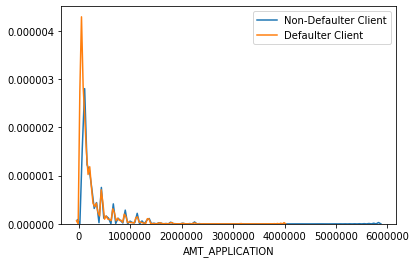

In [170]:
sns.distplot(good_client["AMT_APPLICATION"], hist= False, label = "Non-Defaulter Client")
sns.distplot(defaulter["AMT_APPLICATION"], hist = False, label= "Defaulter Client")

More number of applicants apply for loan amount less than 1000000. 
The applicant who tend to be defaulter apply for loan of lesser amount.

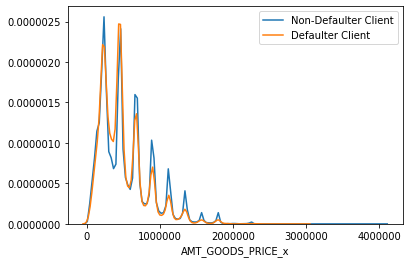

In [171]:
sns.distplot(good_client["AMT_GOODS_PRICE_x"], hist= False, label = "Non-Defaulter Client")
sns.distplot(defaulter["AMT_GOODS_PRICE_x"], hist = False, label= "Defaulter Client")

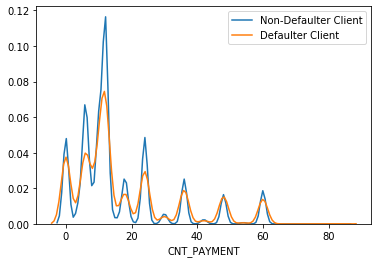

In [172]:
sns.distplot(good_client["CNT_PAYMENT"], hist= False, label = "Non-Defaulter Client")
sns.distplot(defaulter["CNT_PAYMENT"], hist = False, label= "Defaulter Client")

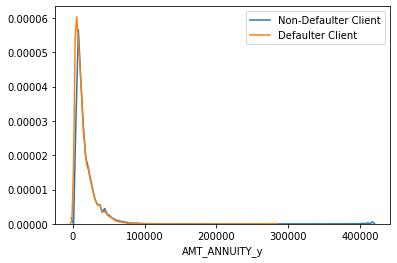

In [173]:
sns.distplot(good_client["AMT_ANNUITY_y"], hist= False, label = "Non-Defaulter Client")
sns.distplot(defaulter["AMT_ANNUITY_y"], hist = False, label= "Defaulter Client")

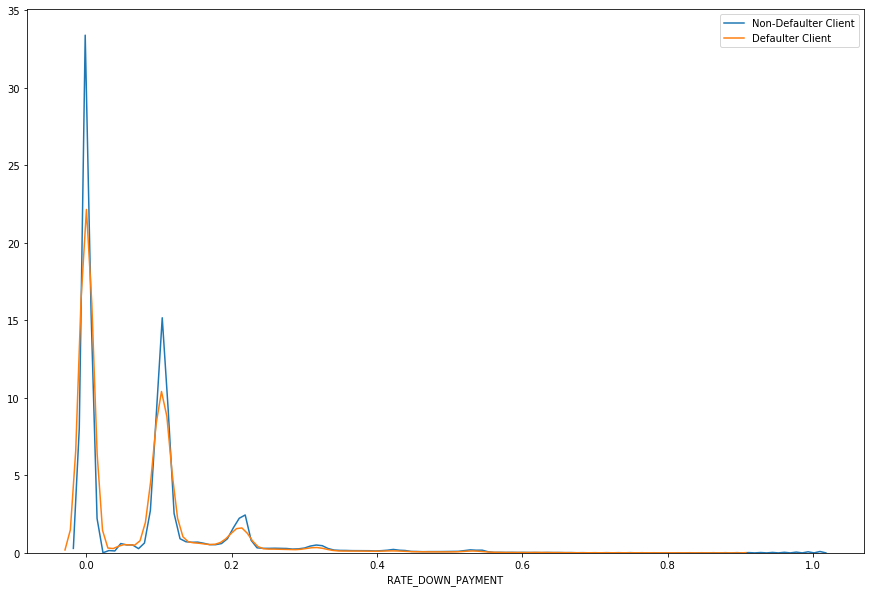

In [174]:
plt.figure(figsize =(15,10))
sns.distplot(good_client["RATE_DOWN_PAYMENT"], hist= False, label = "Non-Defaulter Client")
sns.distplot(defaulter["RATE_DOWN_PAYMENT"], hist = False, label= "Defaulter Client")

### BIVARIATE

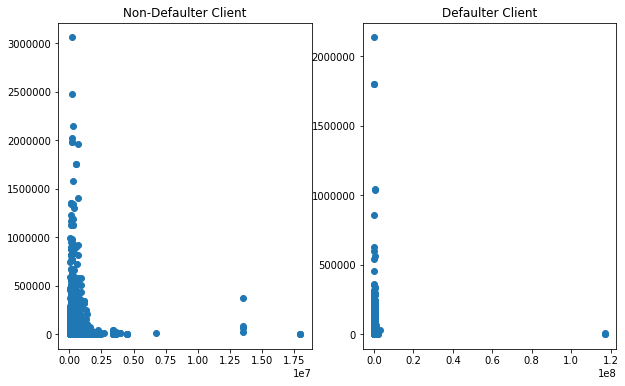

In [175]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
plt.scatter(good_client["AMT_INCOME_TOTAL"],good_client["AMT_DOWN_PAYMENT"] )
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(defaulter["AMT_INCOME_TOTAL"],defaulter["AMT_DOWN_PAYMENT"] )
plt.title("Defaulter Client")
plt.show()

It can be observed that the applicant having more income are more likely to pay the loan.

In [176]:
app_prev_data.nunique().sort_values()

FLAG_MOBIL                            1
FLAG_DOCUMENT_6                       2
LIVE_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_LIVE_CITY                2
REG_CITY_NOT_WORK_CITY                2
LIVE_CITY_NOT_WORK_CITY               2
EMERGENCYSTATE_MODE                   2
FLAG_DOCUMENT_2                       2
FLAG_DOCUMENT_3                       2
FLAG_DOCUMENT_4                       2
FLAG_DOCUMENT_5                       2
FLAG_DOCUMENT_7                       2
FLAG_DOCUMENT_8                       2
FLAG_DOCUMENT_9                       2
FLAG_DOCUMENT_10                      2
FLAG_DOCUMENT_11                      2
FLAG_DOCUMENT_12                      2
FLAG_DOCUMENT_13                      2
FLAG_DOCUMENT_14                      2
FLAG_DOCUMENT_15                      2
FLAG_DOCUMENT_16                      2
FLAG_DOCUMENT_17                      2
FLAG_DOCUMENT_18                      2
FLAG_DOCUMENT_19                      2
FLAG_DOCUMENT_20                      2


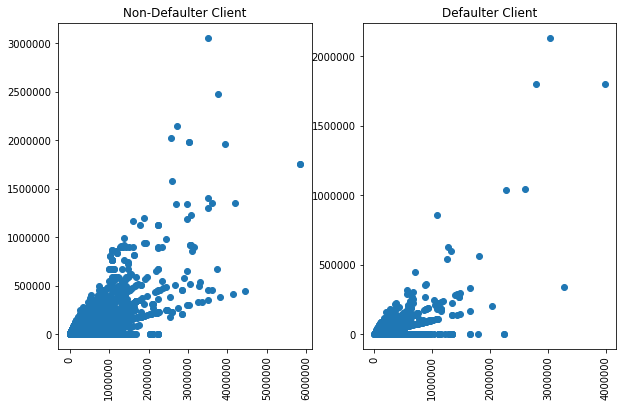

In [177]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
plt.scatter(good_client["AMT_APPLICATION"],good_client["AMT_DOWN_PAYMENT"] )
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(defaulter["AMT_APPLICATION"],defaulter["AMT_DOWN_PAYMENT"] )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

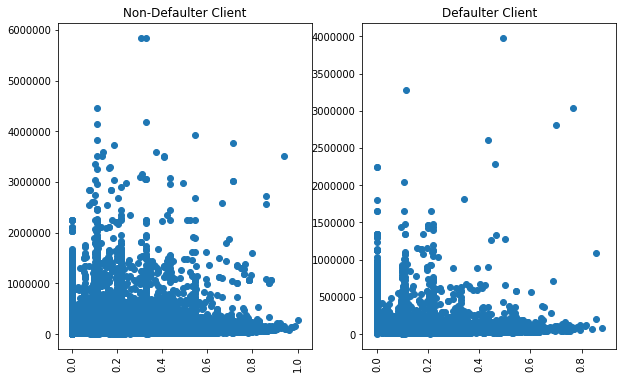

In [178]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
plt.scatter(good_client["RATE_DOWN_PAYMENT"],good_client["AMT_APPLICATION"] )
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(defaulter["RATE_DOWN_PAYMENT"],defaulter["AMT_APPLICATION"] )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

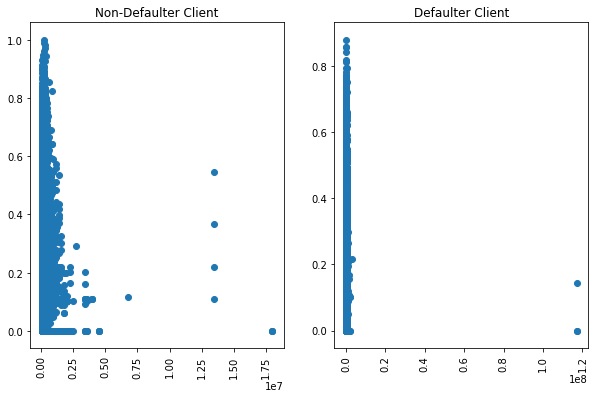

In [179]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
plt.scatter(good_client["AMT_INCOME_TOTAL"],good_client["RATE_DOWN_PAYMENT"] )
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
plt.scatter(defaulter["AMT_INCOME_TOTAL"],defaulter["RATE_DOWN_PAYMENT"] )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

The applicant having more income and rate down payment of loan is less are more likely to pay the loan.

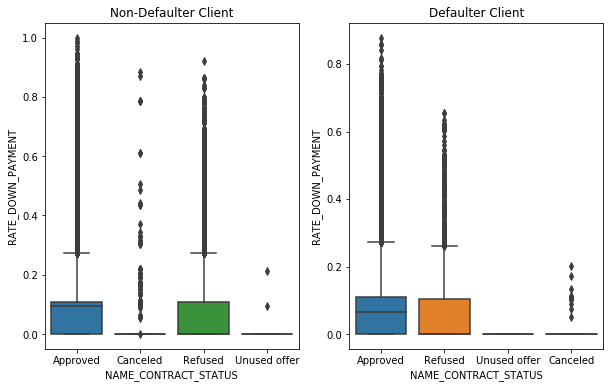

In [180]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "RATE_DOWN_PAYMENT", data= good_client)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "RATE_DOWN_PAYMENT", data= defaulter)
plt.title("Defaulter Client")
plt.show()

The applicant whose previous loan status was approved and having rate of down payment close to 0.1 are more likely to pay the loan.

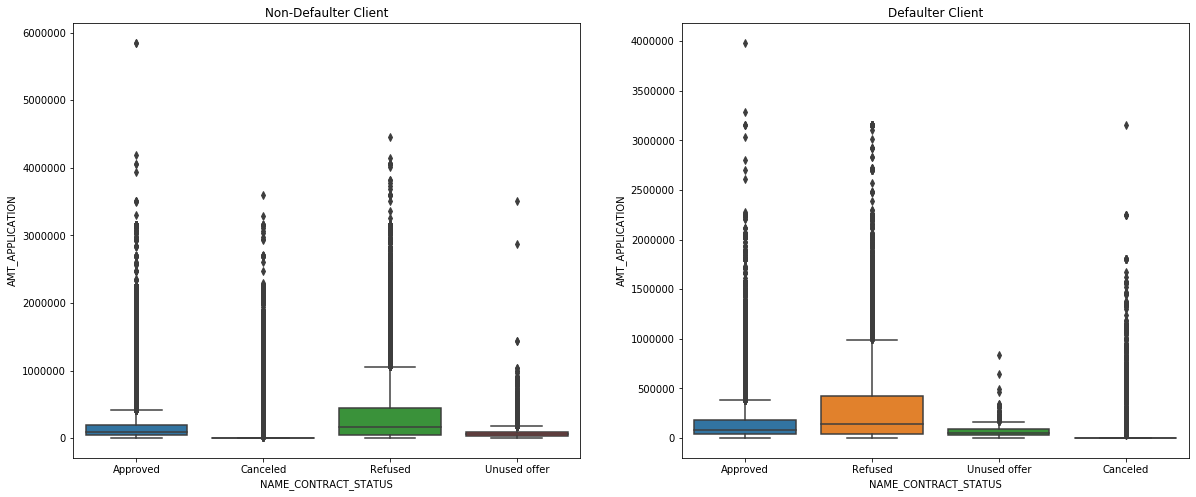

In [181]:
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "AMT_APPLICATION", data= good_client)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "AMT_APPLICATION", data= defaulter)
plt.title("Defaulter Client")
plt.show()

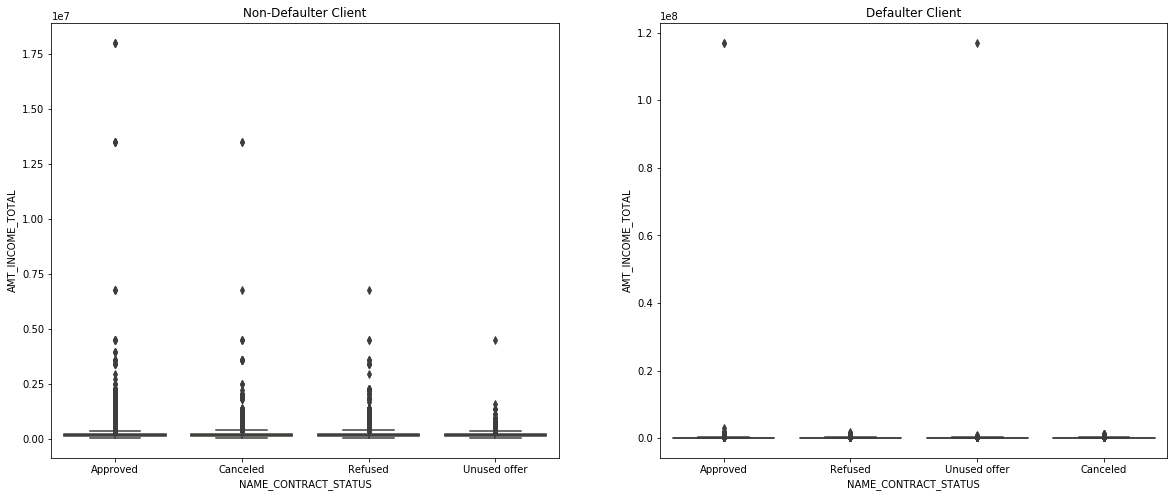

In [182]:
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "AMT_INCOME_TOTAL", data= good_client)
plt.title("Non-Defaulter Client")
plt.subplot(1,2,2)
sns.boxplot(x = "NAME_CONTRACT_STATUS", y= "AMT_INCOME_TOTAL", data= defaulter)
plt.title("Defaulter Client")
plt.show()

Text(0.5, 1.0, 'Non-Defaulter Client')

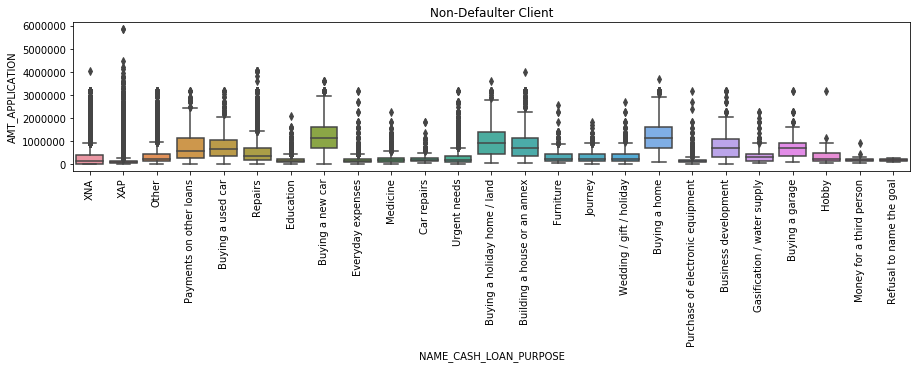

In [183]:
plt.figure(figsize =(15,6))
plt.subplot(2,1,1)
sns.boxplot(x = "NAME_CASH_LOAN_PURPOSE", y= "AMT_APPLICATION", data= good_client)
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")


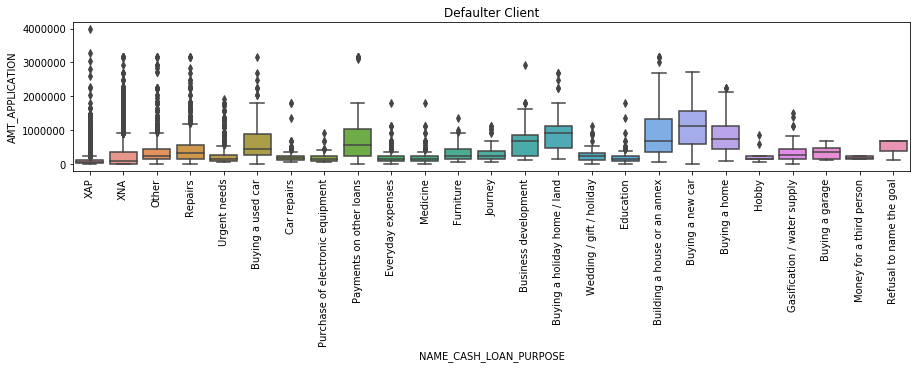

In [184]:
plt.figure(figsize =(15,6))
plt.subplot(2,1,2)
sns.boxplot(x = "NAME_CASH_LOAN_PURPOSE", y= "AMT_APPLICATION", data= defaulter)
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

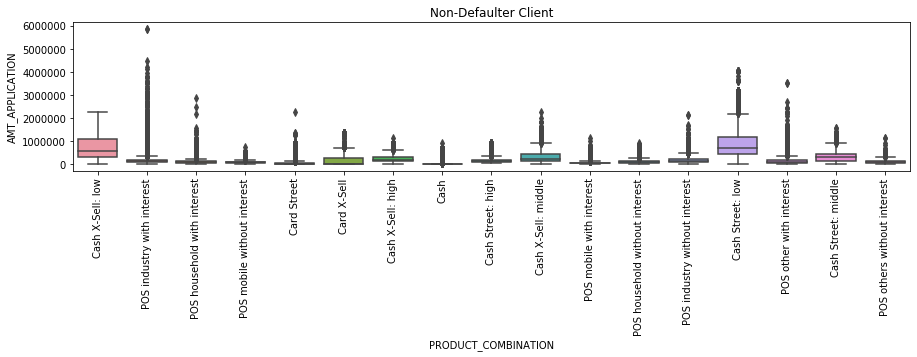

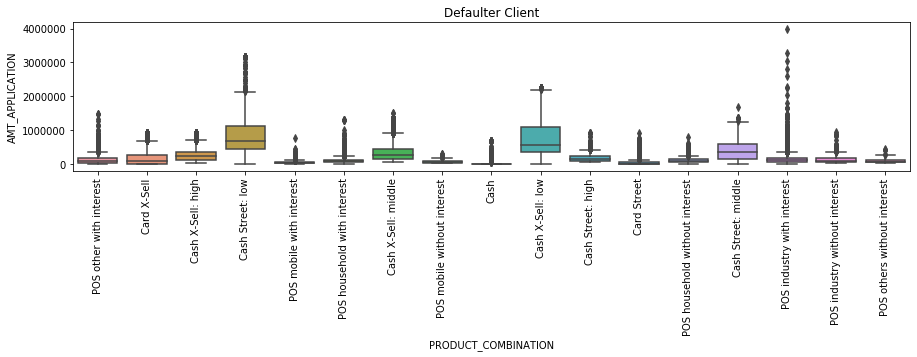

In [185]:
plt.figure(figsize =(15,6))
plt.subplot(2,1,1)
sns.boxplot(x = "PRODUCT_COMBINATION", y= "AMT_APPLICATION", data= good_client)
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")
plt.figure(figsize =(15,6))
plt.subplot(2,1,2)
sns.boxplot(x = "PRODUCT_COMBINATION", y= "AMT_APPLICATION", data= defaulter)
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show()

In [186]:
app_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,0.000000,179055.000000,SATURDAY,9,Y,1,0.000000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,nan,900000.000000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.00

In [187]:
app_prev_data.nunique().sort_values()

FLAG_MOBIL                            1
FLAG_DOCUMENT_6                       2
LIVE_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_LIVE_CITY                2
REG_CITY_NOT_WORK_CITY                2
LIVE_CITY_NOT_WORK_CITY               2
EMERGENCYSTATE_MODE                   2
FLAG_DOCUMENT_2                       2
FLAG_DOCUMENT_3                       2
FLAG_DOCUMENT_4                       2
FLAG_DOCUMENT_5                       2
FLAG_DOCUMENT_7                       2
FLAG_DOCUMENT_8                       2
FLAG_DOCUMENT_9                       2
FLAG_DOCUMENT_10                      2
FLAG_DOCUMENT_11                      2
FLAG_DOCUMENT_12                      2
FLAG_DOCUMENT_13                      2
FLAG_DOCUMENT_14                      2
FLAG_DOCUMENT_15                      2
FLAG_DOCUMENT_16                      2
FLAG_DOCUMENT_17                      2
FLAG_DOCUMENT_18                      2
FLAG_DOCUMENT_19                      2
FLAG_DOCUMENT_20                      2


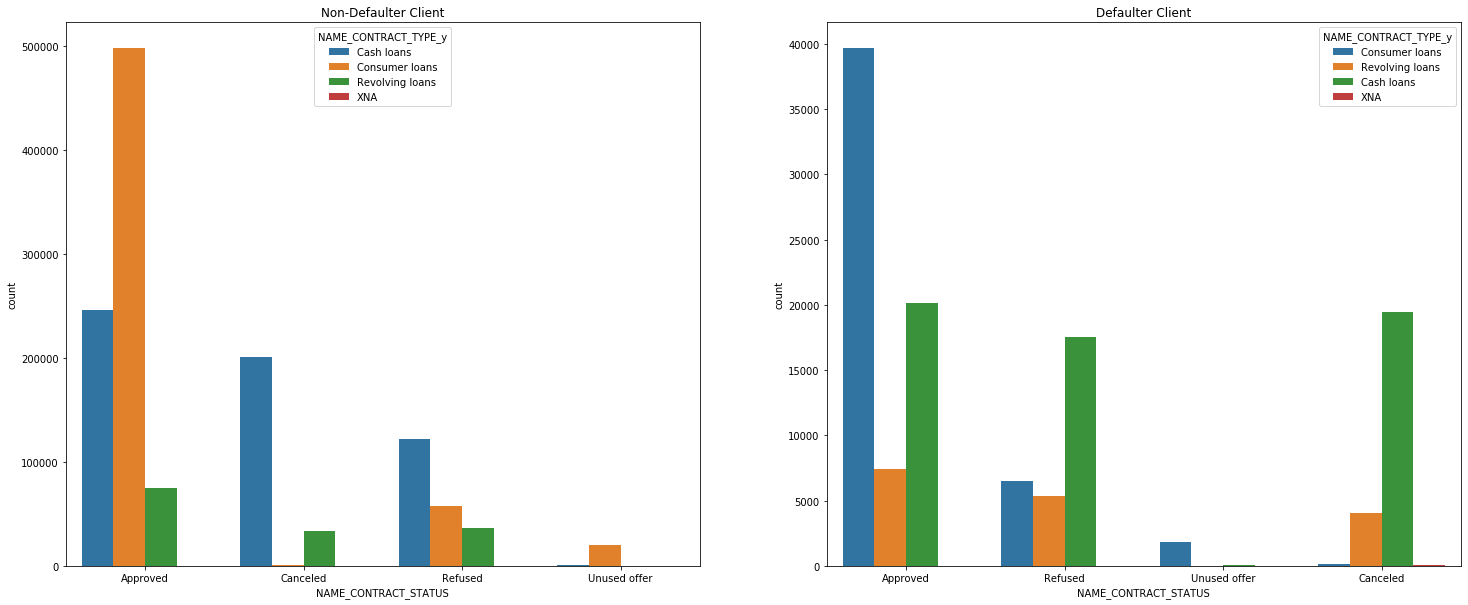

In [188]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_CONTRACT_TYPE_y", data = good_client )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_CONTRACT_TYPE_y", data = defaulter )
plt.title("Defaulter Client")
plt.show() 

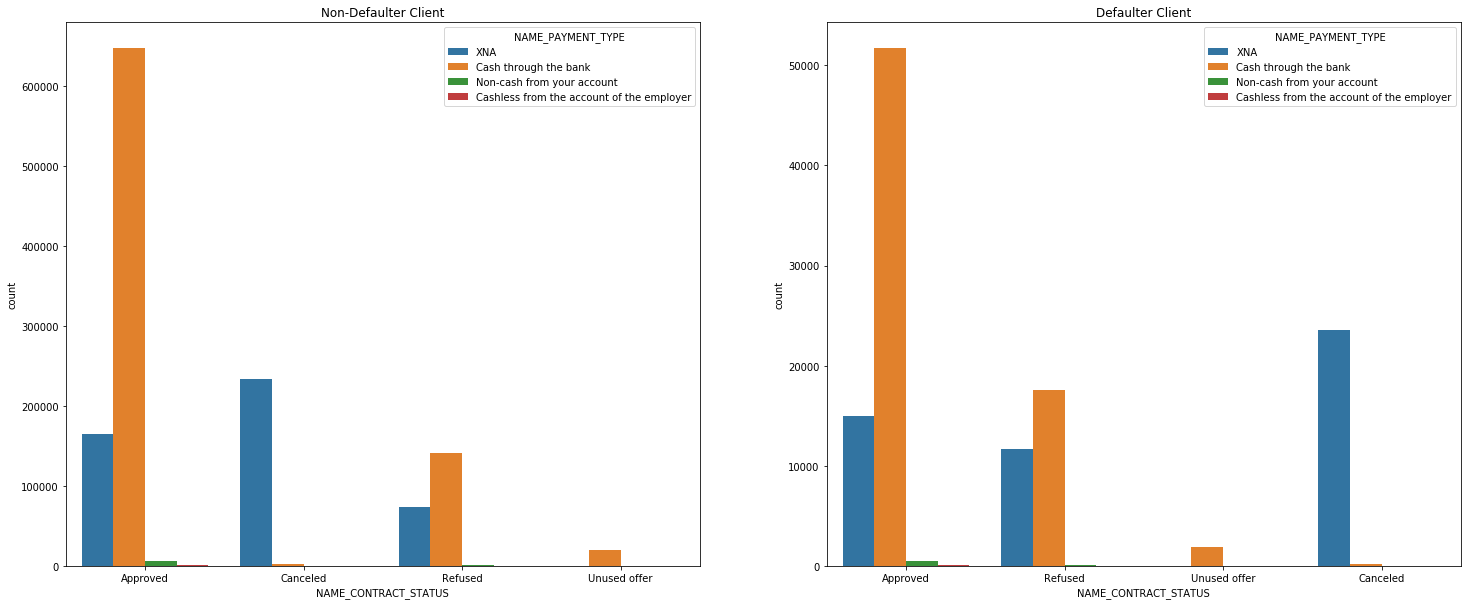

In [189]:
plt.figure(figsize =(25,10))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_PAYMENT_TYPE", data = good_client )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_PAYMENT_TYPE", data = defaulter )
plt.title("Defaulter Client")
plt.show() 

It is observed that applicant whose previous application was refuse and name payment type is cash through the bank are more likely to be a defaulter.

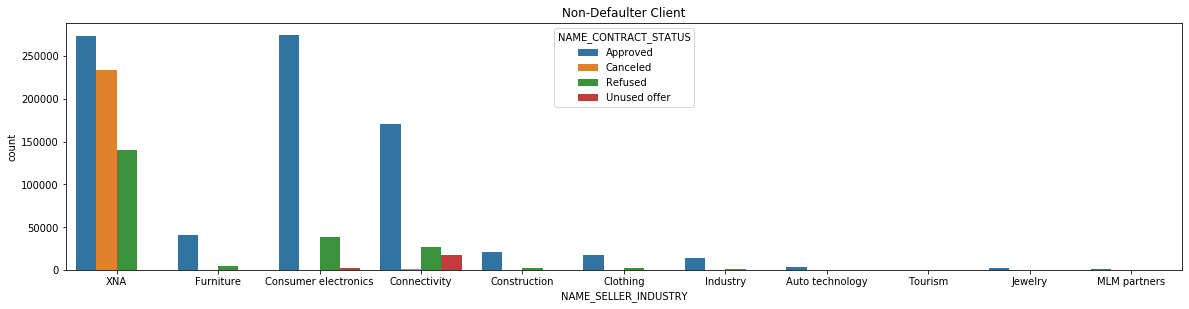

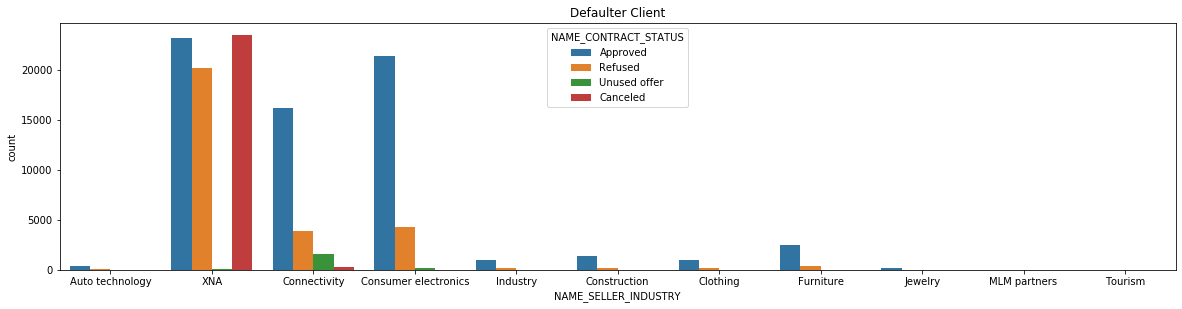

In [190]:
plt.figure(figsize =(20,10))
plt.subplot(2,1,1)
sns.countplot(x = "NAME_SELLER_INDUSTRY", hue = "NAME_CONTRACT_STATUS", data = good_client )
plt.xticks(rotation = 0)
plt.title("Non-Defaulter Client")

plt.figure(figsize =(20,10))
plt.subplot(2,1,2)
sns.countplot(x = "NAME_SELLER_INDUSTRY", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation = 0)
plt.title("Defaulter Client")
plt.show() 


The applicant whose name seller industry is construction and previous application status is refused are most likely to be a defaulter

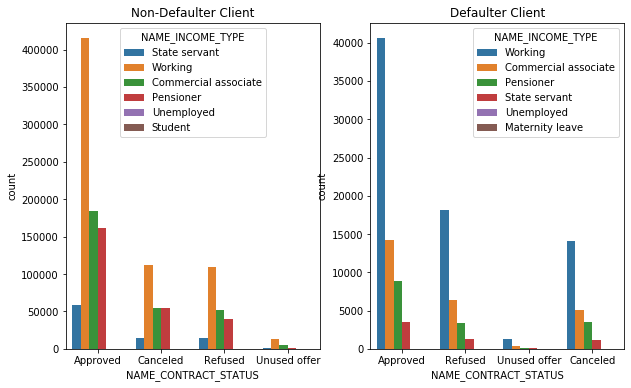

In [191]:
plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_INCOME_TYPE", data = good_client )
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_INCOME_TYPE", data = defaulter )
plt.title("Defaulter Client")
plt.show() 

It can be observed student are most likely to pay the loan.

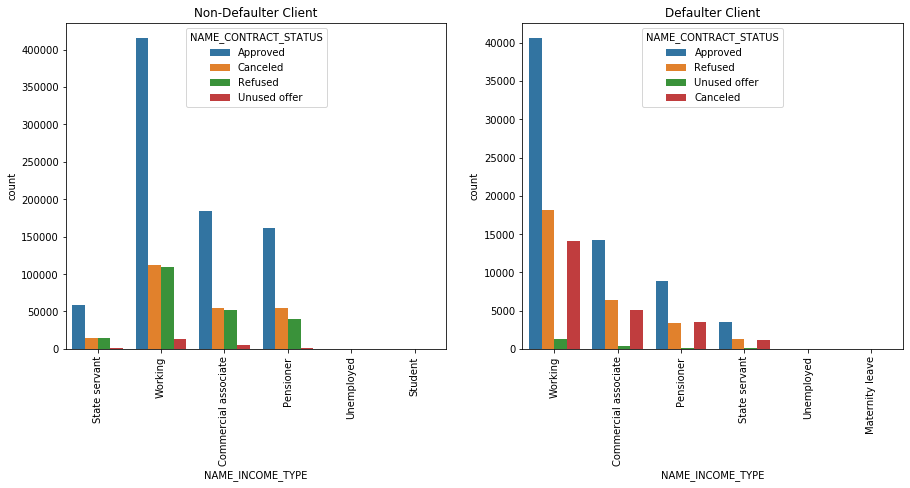

In [192]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "NAME_CONTRACT_STATUS", data = good_client )
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show() 

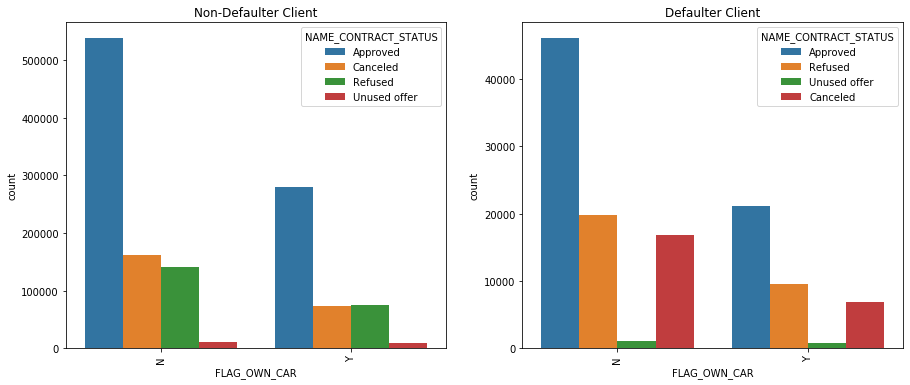

In [193]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_CONTRACT_STATUS", data = good_client )
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show() 

It can be observed that applicant who don't own a car and whose previous application status is Approved tends to take more loan.

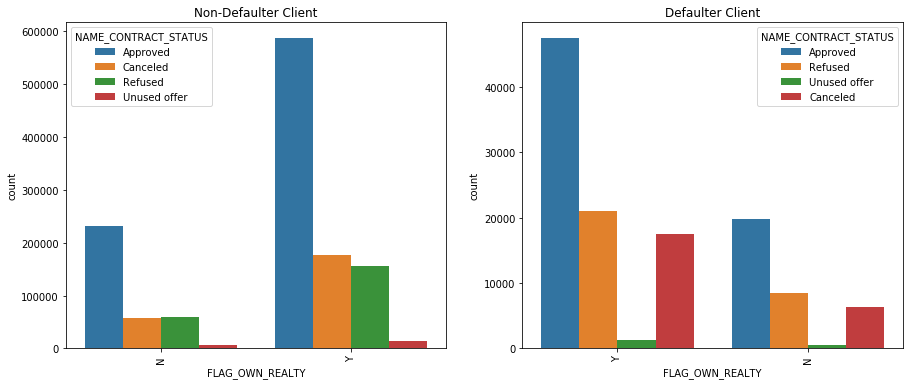

In [194]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "FLAG_OWN_REALTY", hue = "NAME_CONTRACT_STATUS", data = good_client)
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "FLAG_OWN_REALTY", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show() 

It can be observed that applicant who own a house or a flat and whose previous application status is Approved tends to take more loan.

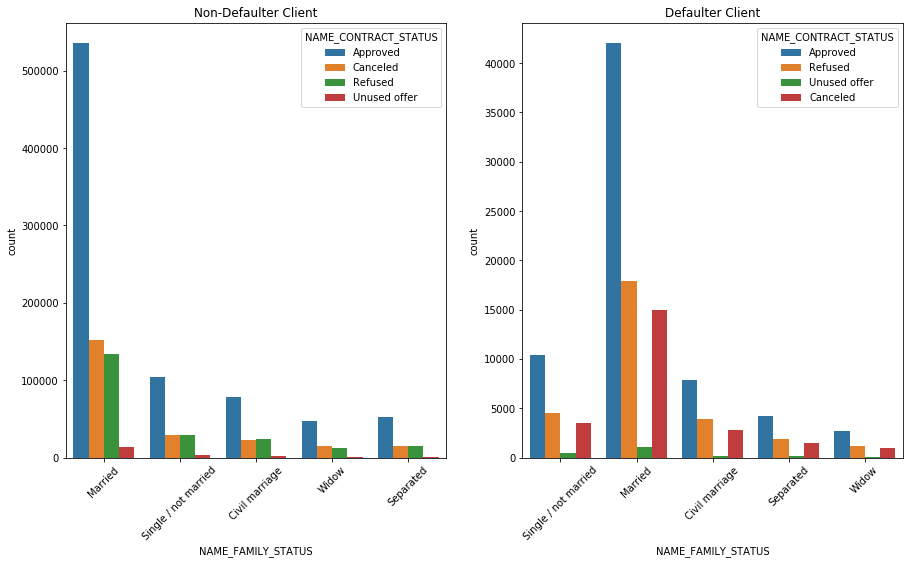

In [195]:
plt.figure(figsize =(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "NAME_CONTRACT_STATUS", data = good_client)
plt.xticks(rotation =45)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =45)
plt.title("Defaulter Client")
plt.show() 

Married applicatants, whose previous application was approved are likley to take loan.


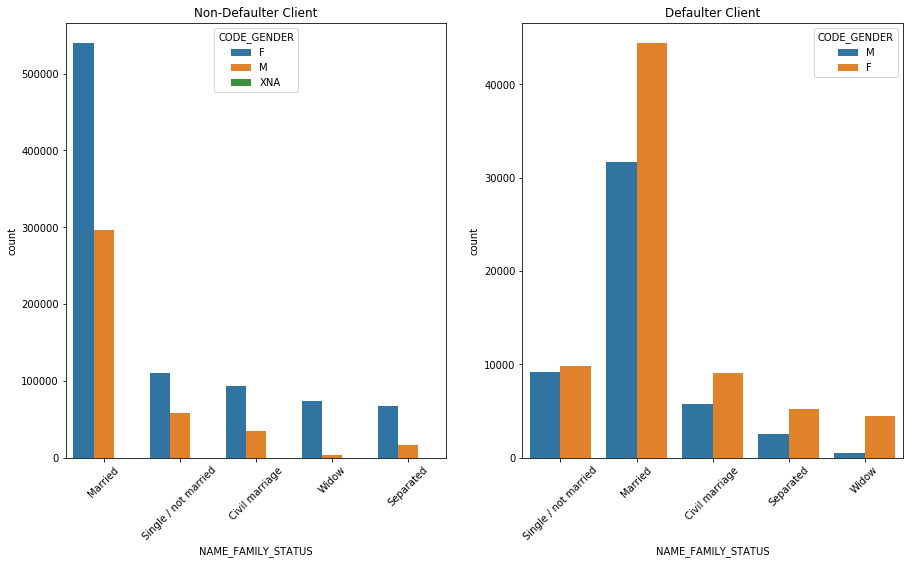

In [196]:
plt.figure(figsize =(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "CODE_GENDER", data = good_client)
plt.xticks(rotation =45)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "CODE_GENDER", data = defaulter )
plt.xticks(rotation =45)
plt.title("Defaulter Client")
plt.show() 

Single/Not Married Male most likely tend to be a defaulter 

In [197]:
app_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AMT_CREDIT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,average income,low credit,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,0.000000,179055.000000,SATURDAY,9,Y,1,0.000000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,above average income,high credit,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,nan,900000.000000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.00

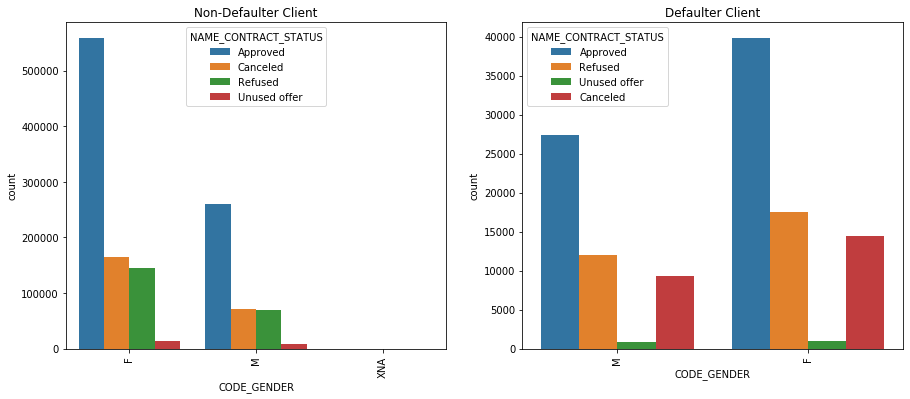

In [198]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "CODE_GENDER", hue = "NAME_CONTRACT_STATUS", data = good_client)
plt.xticks(rotation =90)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "CODE_GENDER", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =90)
plt.title("Defaulter Client")
plt.show() 

It can be observed that the Female applicant whose previous application status was Canceled are likely to be less defaulter than the female applicant whose application status was refused.

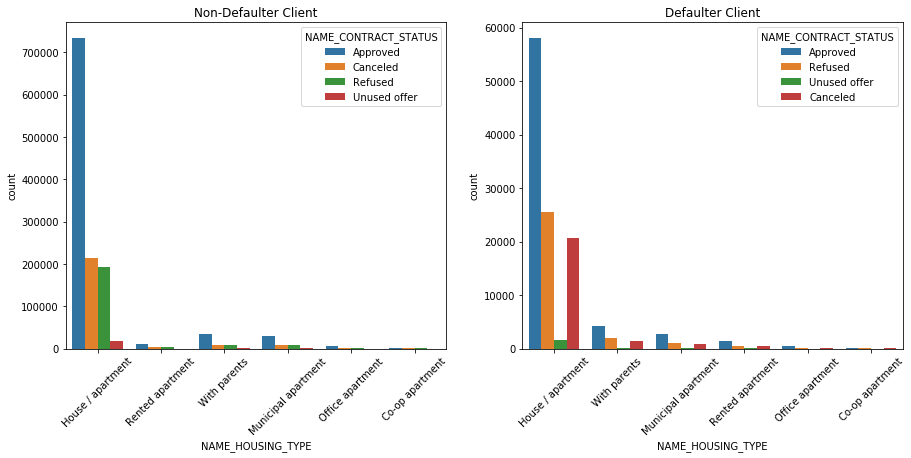

In [199]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", hue = "NAME_CONTRACT_STATUS", data = good_client)
plt.xticks(rotation =45)
plt.title("Non-Defaulter Client")


plt.subplot(1,2,2)
sns.countplot(x = "NAME_HOUSING_TYPE", hue = "NAME_CONTRACT_STATUS", data = defaulter )
plt.xticks(rotation =45)
plt.title("Defaulter Client")
plt.show() 

Observation:
    
   Most applicant have housing type House/appartment who tends to take loan.
    
    
   Applicant who live with parents and have there previous applicantion status refused or cancelled are likely to be a defaulter.

## CONCLUSION
Bank should focus on Married applicant with preference to Married Female having applicant as they are most likely to pay the loan.

Bank should focus more on Student and Businessman to take loans, as they are most likely to return the loan.

Accountants and Cleaning Staff occupation type applicant who are living in any housing type are most likely to be Non-Defaulters. Bank should focus on them.

Cooking Staff and High Skill Tech Staff who are living in any housing type are most likely to be Defaulters. Bank should avoid giving loan to them.

Bank should avoid giving loan to applicant living in rented apartment.

